# Importing the nescessary libraries

In [2]:
# datasetset analysis and wrangling
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import matplotlib.ticker as ticker

# Statistics
from statistics import stdev
from scipy.stats import t
from scipy import stats

# Dates
import matplotlib.dates as mdates

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the datasetset

In [3]:
# Import datasetset

dataset = pd.read_csv(r'C:\Users\USER\quantium_internship.csv')

In [4]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,PRICE_PER_UNIT,TOT_SALES,PACK_SIZE(gram),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,Natural,2,3.0,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,CC's,3,2.1,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,Smiths,5,3.0,15.0,175,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,Kettle,3,4.6,13.8,150,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,Smiths,1,5.7,5.7,330,MIDAGE SINGLES/COUPLES,Budget


## Number of rows and columns present in our dataset

In [5]:
print (f'Present in our dataset are about {dataset.shape[0]} rows and {dataset.shape[0]} columns')

Present in our dataset are about 246592 rows and 246592 columns


###  Datatypes of the columns in our dataset

In [6]:
dataset.dtypes

DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
BRAND                object
PROD_QTY              int64
PRICE_PER_UNIT      float64
TOT_SALES           float64
PACK_SIZE(gram)       int64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

### Converting the 'DATE' column into datetime

In [7]:
dataset['DATE'] = pd.to_datetime(dataset.DATE)

###  Creating the year and month column(YEAR_MONTH)

In [8]:
dataset['YEAR_MONTH'] = dataset['DATE'].dt.to_period('M')
dataset.YEAR_MONTH = dataset.YEAR_MONTH.dt.strftime('%Y%m').astype(int)

In [9]:
dataset.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
BRAND                       object
PROD_QTY                     int64
PRICE_PER_UNIT             float64
TOT_SALES                  float64
PACK_SIZE(gram)              int64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
YEAR_MONTH                   int32
dtype: object

In [10]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,PRICE_PER_UNIT,TOT_SALES,PACK_SIZE(gram),LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,Natural,2,3.0,6.0,175,YOUNG SINGLES/COUPLES,Premium,201810
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,CC's,3,2.1,6.3,175,MIDAGE SINGLES/COUPLES,Budget,201905
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,Smiths,5,3.0,15.0,175,MIDAGE SINGLES/COUPLES,Budget,201808
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,Kettle,3,4.6,13.8,150,MIDAGE SINGLES/COUPLES,Budget,201808
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,Smiths,1,5.7,5.7,330,MIDAGE SINGLES/COUPLES,Budget,201905


# Select control stores

The client has selected stores 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period.

We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of:

- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

Let's first create the metrics of interest and filter out stores that are present throughout the pre-trial period.

For each month and store, calculate:

1. Total sales
2. Number of customers
3. Transaction per customer

Create individual datasetframe and then concatenate all of them together at the end.

## Monthly total sales for each store

In [11]:
mnt_sales = dataset['TOT_SALES'].groupby([dataset['STORE_NBR'],
                             dataset['YEAR_MONTH']]).sum().reset_index()

mnt_sales.rename(columns={'TOT_SALES':'MONTHLY_TOTAL_SALES'}, inplace = True)


mnt_sales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES
0,1,201807,188.9
1,1,201808,165.7
2,1,201809,268.1
3,1,201810,175.4
4,1,201811,184.8
...,...,...,...
3160,272,201902,385.3
3161,272,201903,421.9
3162,272,201904,445.1
3163,272,201905,314.6


## Monthly number of unique customers for each store

In [12]:
mntly_cust = dataset['LYLTY_CARD_NBR'].groupby([dataset['STORE_NBR'],
                             dataset['YEAR_MONTH']]).nunique().reset_index()

mntly_cust.rename(columns={'LYLTY_CARD_NBR':'MONTHLY_NO_CUSTOMERS'}, inplace = True)


mntly_cust

,STORE_NBR,YEAR_MONTH,MONTHLY_NO_CUSTOMERS
0,1,201807,47
1,1,201808,40
2,1,201809,57
3,1,201810,39
4,1,201811,44
...,...,...,...
3160,272,201902,44
3161,272,201903,48
3162,272,201904,54
3163,272,201905,34


## Monthly average number of transactions per customer for each store

In [13]:
mntly_avg_txn = (dataset['TXN_ID'].groupby([dataset['STORE_NBR'],
                             dataset['YEAR_MONTH']]).nunique() / dataset['LYLTY_CARD_NBR'].groupby([dataset['STORE_NBR'],
                             dataset['YEAR_MONTH']]).nunique()).reset_index()

mntly_avg_txn.rename(columns={0:'AVG_NO_TXN'}, inplace = True)

mntly_avg_txn

,STORE_NBR,YEAR_MONTH,AVG_NO_TXN
0,1,201807,1.042553
1,1,201808,1.000000
2,1,201809,1.035088
3,1,201810,1.025641
4,1,201811,1.022727
...,...,...,...
3160,272,201902,1.068182
3161,272,201903,1.062500
3162,272,201904,1.018519
3163,272,201905,1.176471


## Merging dataframes together

In [14]:
one = pd.merge(mnt_sales, mntly_cust, how='left',
        left_on=['STORE_NBR', 'YEAR_MONTH'],
             right_on=['STORE_NBR', 'YEAR_MONTH'])

metrics = pd.merge(one, mntly_avg_txn, how='left',
        left_on=['STORE_NBR', 'YEAR_MONTH'],
             right_on=['STORE_NBR', 'YEAR_MONTH'])


metrics

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN
0,1,201807,188.9,47,1.042553
1,1,201808,165.7,40,1.000000
2,1,201809,268.1,57,1.035088
3,1,201810,175.4,39,1.025641
4,1,201811,184.8,44,1.022727
...,...,...,...,...,...
3160,272,201902,385.3,44,1.068182
3161,272,201903,421.9,48,1.062500
3162,272,201904,445.1,54,1.018519
3163,272,201905,314.6,34,1.176471


## Checking out stores with no transactions in at least a month



In [15]:
stores = pd.pivot_table(dataset, index = 'YEAR_MONTH', columns = 'STORE_NBR', values = 'TXN_ID', aggfunc = 'count')

stores

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,
201807,49.0,38.0,134.0,152.0,111.0,47.0,118.0,41.0,46.0,112.0,...,8.0,47.0,51.0,32.0,2.0,50.0,131.0,124.0,117.0,48.0
201808,40.0,37.0,118.0,144.0,99.0,39.0,124.0,44.0,54.0,120.0,...,5.0,38.0,49.0,34.0,5.0,49.0,126.0,142.0,91.0,42.0
201809,59.0,33.0,118.0,135.0,122.0,35.0,123.0,35.0,54.0,132.0,...,4.0,41.0,31.0,37.0,4.0,30.0,117.0,115.0,104.0,35.0
201810,40.0,41.0,117.0,148.0,98.0,50.0,115.0,48.0,50.0,113.0,...,7.0,38.0,36.0,40.0,4.0,46.0,142.0,104.0,106.0,48.0
201811,45.0,34.0,111.0,127.0,103.0,49.0,124.0,38.0,58.0,112.0,...,2.0,35.0,61.0,34.0,9.0,46.0,125.0,121.0,108.0,43.0
201812,40.0,35.0,124.0,128.0,112.0,38.0,107.0,38.0,50.0,128.0,...,6.0,52.0,40.0,44.0,5.0,39.0,119.0,140.0,108.0,43.0
201901,35.0,43.0,114.0,156.0,108.0,35.0,110.0,50.0,61.0,112.0,...,5.0,45.0,31.0,41.0,8.0,35.0,133.0,146.0,106.0,47.0
201902,51.0,31.0,134.0,97.0,103.0,35.0,118.0,36.0,41.0,113.0,...,6.0,41.0,40.0,31.0,5.0,36.0,123.0,116.0,93.0,47.0
201903,47.0,41.0,126.0,127.0,86.0,39.0,130.0,52.0,49.0,117.0,...,5.0,37.0,35.0,29.0,6.0,44.0,117.0,137.0,96.0,51.0


### Stores and the number of missing monthly transactions

In [16]:
null_stores_count = stores.isnull().sum()[stores.isnull().sum() > 0]

null_stores_count

STORE_NBR
11     10
31     10
44      1
76     11
85     11
92     11
117     2
177     1
193     9
206    10
218     1
252    10
dtype: int64

## List of stores with null transactions in at least a month

In [17]:
null_stores_count.index.tolist()

[11, 31, 44, 76, 85, 92, 117, 177, 193, 206, 218, 252]

## Dropping all stores with at least no transaction in a month within the year under review

In [18]:
len(metrics)

3165

In [19]:
metrics = metrics[~metrics['STORE_NBR'].isin(null_stores_count.index)]

In [20]:
len(metrics)

3108

## Filter to pre-trial period i.e. before 2019-02

In [21]:
pretrialperiod = metrics[metrics.YEAR_MONTH < 201902]

pretrialperiod

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN
0,1,201807,188.9,47,1.042553
1,1,201808,165.7,40,1.000000
2,1,201809,268.1,57,1.035088
3,1,201810,175.4,39,1.025641
4,1,201811,184.8,44,1.022727
...,...,...,...,...,...
3155,272,201809,294.5,31,1.129032
3156,272,201810,405.1,41,1.146341
3157,272,201811,355.8,39,1.102564
3158,272,201812,363.1,43,1.000000


## Create a function which calculates the correlation between trial store and other stores based on a single metric

In [22]:
def calculateCorrelation(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Correlation': []})
    
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        output = output.append({'Store1': trial_store, 'Store2': i, 'Correlation': b.corr(a)}, ignore_index = True)
    return output

## Create a function which calculates the standardised magnitude difference between trial store and other stores based on a single metric

In [23]:
def calculateMagnitudeDistance(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        
        #calculating the magnitude difference
        c = abs(a-b)
        
        #Reversed Scale min-max normalization(The lower the difference the higher the scale)
        d = (c.max() - c)/(c.max() - c.min())
        e = d.mean()
        output = output.append({'Store1': trial_store, 'Store2': i, 'Magnitude': e}, ignore_index = True)
    return output

# Selecting control store for trial store 77

In [24]:
# Now let's use those two functions to find the control store

# Compute correlation with trial store 77
trial_store = 77
corr_nSales = calculateCorrelation(pretrialperiod, 'MONTHLY_TOTAL_SALES', trial_store)
corr_nCustomers = calculateCorrelation(pretrialperiod, 'MONTHLY_NO_CUSTOMERS', trial_store)

# Compute magnitude with trial store 77
magnitude_nSales = calculateMagnitudeDistance(pretrialperiod, 'MONTHLY_TOTAL_SALES', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(pretrialperiod, 'MONTHLY_NO_CUSTOMERS', trial_store)


### Correlation for trial store 77 for 'MONTHLY_TOTAL_SALES'

In [25]:
corr_nSales.head()

,Store1,Store2,Correlation
0,77.0,1.0,-0.012711
1,77.0,2.0,-0.364934
2,77.0,3.0,0.556818
3,77.0,4.0,-0.347846
4,77.0,5.0,-0.139048


### Magnitude difference between control store 77 and stores

In [26]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,77.0,1.0,0.485563
1,77.0,2.0,0.489380
2,77.0,3.0,0.544536
3,77.0,4.0,0.620764
4,77.0,5.0,0.505967


### Concatenate the scores together for 'MONTHLY_TOTAL_SALES'

In [27]:
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)

### Getting the average of the correlation and magnitude scores

In [28]:
score_nSales['Sales_Score'] = score_nSales[['Correlation','Magnitude']].mean(axis=1)

score_nSales.head()

,Store1,Store2,Correlation,Magnitude,Sales_Score
0,77.0,1.0,-0.012711,0.485563,0.236426
1,77.0,2.0,-0.364934,0.489380,0.062223
2,77.0,3.0,0.556818,0.544536,0.550677
3,77.0,4.0,-0.347846,0.620764,0.136459
4,77.0,5.0,-0.139048,0.505967,0.183459


### Concating Correlation and Magnitude score for trial store 77 for 'MONTHLY_NO_CUSTOMERS'

In [29]:
score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.313085,0.655462
1,77.0,2.0,-0.669731,0.414286
2,77.0,3.0,0.613408,0.452381
3,77.0,4.0,-0.305412,0.526531
4,77.0,5.0,0.224768,0.642857


### Getting the average of the correlation and magnitude scores

In [30]:
score_nCustomers['Customers_Score'] = score_nCustomers[['Correlation','Magnitude']].mean(axis=1)

score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude,Customers_Score
0,77.0,1.0,0.313085,0.655462,0.484274
1,77.0,2.0,-0.669731,0.414286,-0.127723
2,77.0,3.0,0.613408,0.452381,0.532895
3,77.0,4.0,-0.305412,0.526531,0.110559
4,77.0,5.0,0.224768,0.642857,0.433813


### index both 'score_nSales' and 'score_nCustomers' datasetframe

In [31]:
score_nSales.set_index(['Store1', 'Store2'], inplace = True)

score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)

In [32]:
# Create a new datasetsetframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['Sales_Score'], score_nCustomers['Customers_Score']], axis = 1)
score_Control

Sales_Score  Customers_Score
Store1 Store2                              
77.0   1.0        0.236426         0.484274
       2.0        0.062223        -0.127723
       3.0        0.550677         0.532895
       4.0        0.136459         0.110559
       5.0        0.183459         0.433813
...                    ...              ...
       268.0      0.436152         0.485779
       269.0      0.070099         0.165164
       270.0      0.426017         0.271902
       271.0      0.261603         0.176414
       272.0      0.195743         0.347525

[259 rows x 2 columns]

### Add a new column to 'score_Control' which computes the average of 'Sales_Score' and 'Customers_Score'

In [33]:
score_Control['finalControlScore'] = (score_Control['Sales_Score'] + score_Control['Customers_Score']) *0.5


score_Control = score_Control[score_Control['finalControlScore'] < 1] # Excluding the trial store in the 'Store2' column

score_Control

Sales_Score  Customers_Score  finalControlScore
Store1 Store2                                                 
77.0   1.0        0.236426         0.484274           0.360350
       2.0        0.062223        -0.127723          -0.032750
       3.0        0.550677         0.532895           0.541786
       4.0        0.136459         0.110559           0.123509
       5.0        0.183459         0.433813           0.308636
...                    ...              ...                ...
       268.0      0.436152         0.485779           0.460965
       269.0      0.070099         0.165164           0.117631
       270.0      0.426017         0.271902           0.348960
       271.0      0.261603         0.176414           0.219008
       272.0      0.195743         0.347525           0.271634

[258 rows x 3 columns]

### Top 5 stores with highest 'finalControlScore'

In [34]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head(5)

Sales_Score  Customers_Score  finalControlScore
Store1 Store2                                                 
77.0   233.0      0.779251         0.875698           0.827475
       50.0       0.693430         0.747556           0.720493
       162.0      0.655914         0.699417           0.677665
       119.0      0.594545         0.745246           0.669896
       71.0       0.742483         0.590307           0.666395

###  Create a new dataframe 'pastSales'

In [35]:
pastSales = pretrialperiod


# Create a new column within 'pastSales' which categorises store type
store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == 233:
        store_type.append('Control Store_1')      
    elif i == 50:
        store_type.append('Control Store_2')
    elif i == 162:
        store_type.append('Control Store_3')
    elif i == 119:
        store_type.append('Control Store_4')  
    elif i == 71:
        store_type.append('Control Store_5')     
    
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type
0,1,201807,188.9,47,1.042553,Other Stores
1,1,201808,165.7,40,1.000000,Other Stores
2,1,201809,268.1,57,1.035088,Other Stores
3,1,201810,175.4,39,1.025641,Other Stores
4,1,201811,184.8,44,1.022727,Other Stores


In [36]:
# Currently 'YEARMONTH' is an int64 so we need to turn it into a datetime variable to able to plot
# Create a new column 'TXN_MONTH'

pastSales['TXN_MONTH'] = pd.to_datetime(pastSales['YEAR_MONTH'].astype(str), format = '%Y%m')

pastSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01


In [37]:
# Now create 'MONTHLY_TOTAL_SALES' visualisation for control store_1,2,3,4, and 5 trial store and other stores


# First create relevant dataframes 
#(controlSalesPlot_1) 
controlSalesPlot_1 = pastSales.loc[pastSales['store_type'] == 'Control Store_1', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_1.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_1.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_1'}, inplace = True)

#(controlSalesPlot_2)
controlSalesPlot_2 = pastSales.loc[pastSales['store_type'] == 'Control Store_2', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_2.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_2.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_2'}, inplace = True)

#(controlSalesPlot_3)
controlSalesPlot_3 = pastSales.loc[pastSales['store_type'] == 'Control Store_3', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_3.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_3.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_3'}, inplace = True)

#(controlSalesPlot_4)
controlSalesPlot_4 = pastSales.loc[pastSales['store_type'] == 'Control Store_4', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_4.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_4.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_4'}, inplace = True)

#(controlSalesPlot_5)
controlSalesPlot_5 = pastSales.loc[pastSales['store_type'] == 'Control Store_5', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_5.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_5.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_5'}, inplace = True)

trialSalesPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
trialSalesPlot.set_index('TXN_MONTH', inplace = True)
trialSalesPlot.rename(columns = {'MONTHLY_TOTAL_SALES': 'Trial Store'}, inplace = True)

otherSalesPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TXN_MONTH').MONTHLY_TOTAL_SALES.mean())
otherSalesPlot.rename(columns = {'MONTHLY_TOTAL_SALES': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot_1 = pd.concat([controlSalesPlot_1, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_2 = pd.concat([controlSalesPlot_2, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_3 = pd.concat([controlSalesPlot_3, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_4 = pd.concat([controlSalesPlot_4, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_5 = pd.concat([controlSalesPlot_5, trialSalesPlot, otherSalesPlot], axis = 1)

### Visualizing The Top 5 Stores in Sales

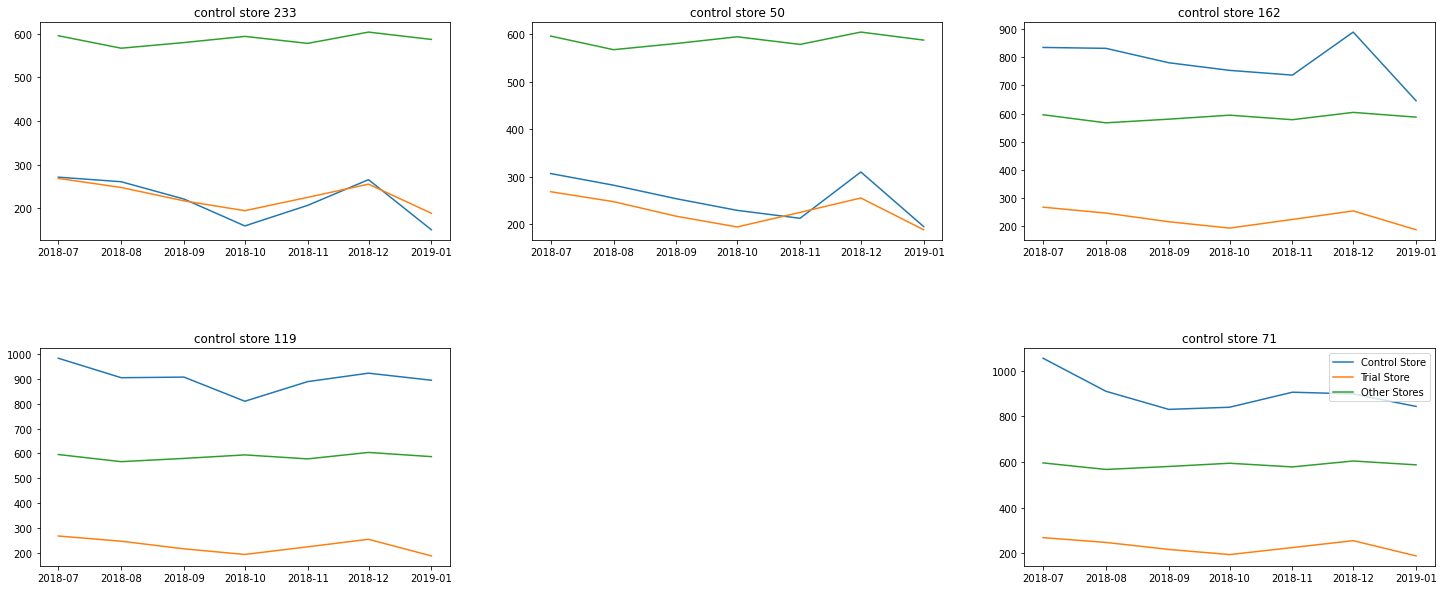

In [38]:
fig,ax = plt.subplots(2,3,figsize=(25,10))
ax[1][1].set_visible(False)


ax[0,0].plot(combineSalesPlot_1)
ax[0,0].set_title('control store 233')

ax[0,1].plot(combineSalesPlot_2)
ax[0,1].set_title('control store 50')

ax[0,2].plot(combineSalesPlot_3)
ax[0,2].set_title('control store 162')

ax[1,0].plot(combineSalesPlot_4)
ax[1,0].set_title('control store 119')

ax[1,2].plot(combineSalesPlot_5)
ax[1,2].set_title('control store 71')

# Set legend
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 1)

fig.subplots_adjust(hspace=.5)


plt.savefig('trial77_sales5.png')



plt.show()

In [39]:
# Do the same for 'nCustomers' 

# First create relevant datasetframes 
controlCustomersPlot_1 = pastSales.loc[pastSales['store_type'] == 'Control Store_1', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_1.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_1.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_1'}, inplace = True)

controlCustomersPlot_2 = pastSales.loc[pastSales['store_type'] == 'Control Store_2', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_2.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_2.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_2'}, inplace = True)

controlCustomersPlot_3 = pastSales.loc[pastSales['store_type'] == 'Control Store_3', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_3.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_3.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_3'}, inplace = True)

controlCustomersPlot_4 = pastSales.loc[pastSales['store_type'] == 'Control Store_4', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_4.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_4.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_4'}, inplace = True)

controlCustomersPlot_5 = pastSales.loc[pastSales['store_type'] == 'Control Store_5', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_5.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_5.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_5'}, inplace = True)

trialCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
trialCustomersPlot.set_index('TXN_MONTH', inplace = True)
trialCustomersPlot.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Trial Store'}, inplace = True)

otherCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TXN_MONTH').MONTHLY_NO_CUSTOMERS.mean())
otherCustomersPlot.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot_1 = pd.concat([controlCustomersPlot_1, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_2 = pd.concat([controlCustomersPlot_2, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_3 = pd.concat([controlCustomersPlot_3, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_4 = pd.concat([controlCustomersPlot_4, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_5 = pd.concat([controlCustomersPlot_5, trialCustomersPlot, otherCustomersPlot], axis = 1)


### Visualizing The Top 5 Stores in Customers

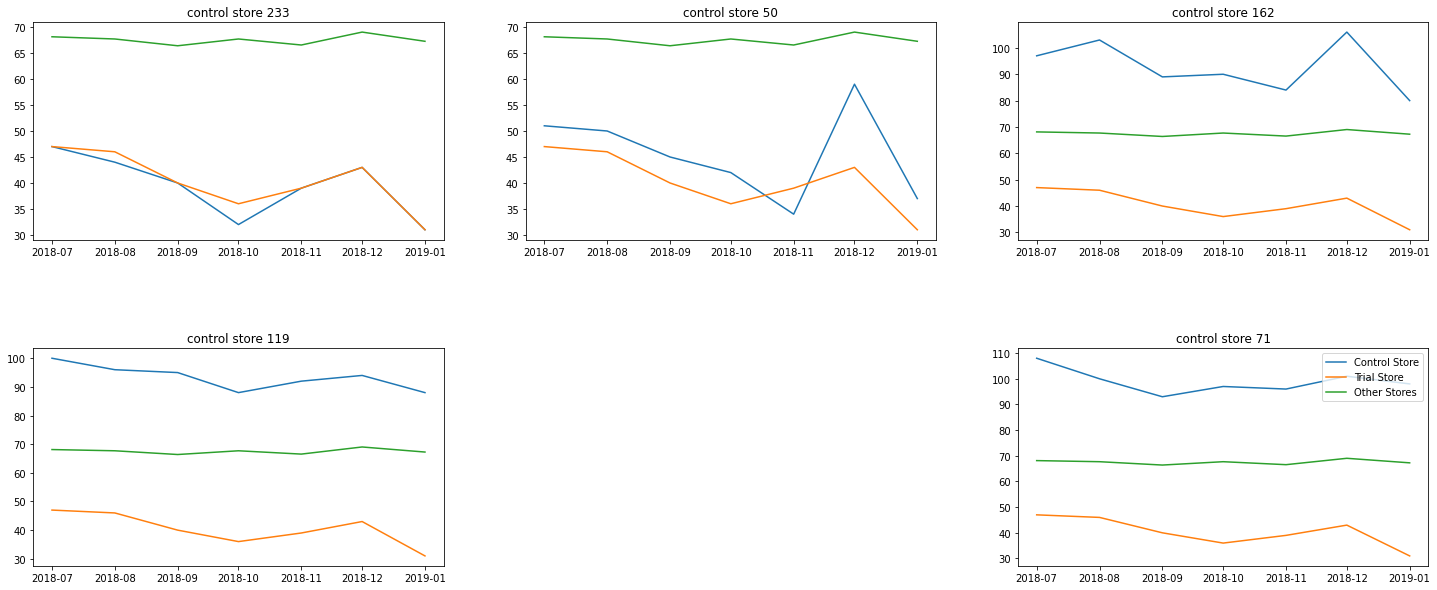

In [40]:
fig,ax = plt.subplots(2,3,figsize=(25,10))
ax[1][1].set_visible(False)


ax[0,0].plot(combineCustomersPlot_1)
ax[0,0].set_title('control store 233')

ax[0,1].plot(combineCustomersPlot_2)
ax[0,1].set_title('control store 50')

ax[0,2].plot(combineCustomersPlot_3)
ax[0,2].set_title('control store 162')

ax[1,0].plot(combineCustomersPlot_4)
ax[1,0].set_title('control store 119')

ax[1,2].plot(combineCustomersPlot_5)
ax[1,2].set_title('control store 71')

# Set legend
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 1)

fig.subplots_adjust(hspace=.5)


plt.savefig('trial77_customers5.png')



plt.show()

In [41]:
# Now that we have visually checked and confirmed, which of the stores are similar to store 77 before the trial period.
# We can set the store 233 as 'control_store'

control_store = 233

# Assessment of trial for trial strore 77

The trial period goes from the start of February 2019 to end of April 2019. We now want to see if there has been an uplift in overall chip sales. 

In [42]:
pretrialperiod.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01


In [43]:
# First we need to work out a scaling factor to applied to the control store
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store
# Let's call this variable 'scalingFactorSales'

trial_sum = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'MONTHLY_TOTAL_SALES'].sum()
control_sum = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_1', 'MONTHLY_TOTAL_SALES'].sum()
scalingFactorSales = trial_sum / control_sum
scalingFactorSales

1.0397523623330076

In [44]:
# Create a new datasetsetframe 'scaledControlSales'
# Recall our datasetsetframe before filtering out the trial period is called 'measureOverTime'

metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN
0,1,201807,188.9,47,1.042553
1,1,201808,165.7,40,1.000000
2,1,201809,268.1,57,1.035088
3,1,201810,175.4,39,1.025641
4,1,201811,184.8,44,1.022727


In [45]:
# Create datasetsetframe and reset index

scaledControlSales = metrics
scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN
0,1,201807,188.9,47,1.042553
1,1,201808,165.7,40,1.000000
2,1,201809,268.1,57,1.035088
3,1,201810,175.4,39,1.025641
4,1,201811,184.8,44,1.022727


In [46]:
# We only want control store i.e. store 233

scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN
2695,233,201807,271.2,47,1.042553
2696,233,201808,260.7,44,1.022727
2697,233,201809,220.9,40,1.075000
2698,233,201810,159.3,32,1.000000
2699,233,201811,206.5,39,1.025641
2700,233,201812,265.4,43,1.046512
2701,233,201901,150.5,31,1.000000
2702,233,201902,220.7,42,1.023810
2703,233,201903,180.6,35,1.028571
2704,233,201904,144.2,27,1.037037


In [47]:
# Create 'controlSales' which applies 'scalingFactorSales' to 'totSales' column

scaledControlSales['controlSales'] = scaledControlSales['MONTHLY_TOTAL_SALES'] * scalingFactorSales
scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,controlSales
2695,233,201807,271.2,47,1.042553,281.980841
2696,233,201808,260.7,44,1.022727,271.063441
2697,233,201809,220.9,40,1.075000,229.681297
2698,233,201810,159.3,32,1.000000,165.632551
2699,233,201811,206.5,39,1.025641,214.708863


In [48]:
# Create 'percentageDiff' datasetframe
percentageDiff = scaledControlSales[['YEAR_MONTH', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'totSales'
trialSales = metrics.loc[metrics['STORE_NBR'] == trial_store, 'MONTHLY_TOTAL_SALES']
trialSales.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'MONTHLY_TOTAL_SALES': 'trialSales'}, inplace = True)

percentageDiff

,YEAR_MONTH,controlSales,trialSales
0,201807,281.980841,268.4
1,201808,271.063441,247.5
2,201809,229.681297,216.8
3,201810,165.632551,194.3
4,201811,214.708863,224.9
5,201812,275.950277,255.2
6,201901,156.482731,188.4
7,201902,229.473346,211.6
8,201903,187.779277,255.1
9,201904,149.932291,258.1


In [49]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,YEAR_MONTH,controlSales,trialSales,percentageDiff
0,201807,281.980841,268.4,0.048162
1,201808,271.063441,247.5,0.086930
2,201809,229.681297,216.8,0.056083
3,201810,165.632551,194.3,0.173079
4,201811,214.708863,224.9,0.047465
5,201812,275.950277,255.2,0.075196
6,201901,156.482731,188.4,0.203967
7,201902,229.473346,211.6,0.077889
8,201903,187.779277,255.1,0.358510
9,201904,149.932291,258.1,0.721444


In [50]:
# Recall our 'scaledControlSales' datasetsetframe

scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,controlSales
2695,233,201807,271.2,47,1.042553,281.980841
2696,233,201808,260.7,44,1.022727,271.063441
2697,233,201809,220.9,40,1.075000,229.681297
2698,233,201810,159.3,32,1.000000,165.632551
2699,233,201811,206.5,39,1.025641,214.708863


In [51]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.06363898833418724

In [52]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [53]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7     1.223912
8     5.633494
9    11.336505
Name: tValue, dtype: float64

In [54]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April

1.8945786050613054

In [55]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TXN_MONTH'] = pd.to_datetime(scaledControlSales['YEAR_MONTH'].astype(str), format = '%Y%m')
scaledControlSales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,controlSales,TXN_MONTH
2695,233,201807,271.2,47,1.042553,281.980841,2018-07-01
2696,233,201808,260.7,44,1.022727,271.063441,2018-08-01
2697,233,201809,220.9,40,1.075000,229.681297,2018-09-01
2698,233,201810,159.3,32,1.000000,165.632551,2018-10-01
2699,233,201811,206.5,39,1.025641,214.708863,2018-11-01
2700,233,201812,265.4,43,1.046512,275.950277,2018-12-01
2701,233,201901,150.5,31,1.000000,156.482731,2019-01-01
2702,233,201902,220.7,42,1.023810,229.473346,2019-02-01
2703,233,201903,180.6,35,1.028571,187.779277,2019-03-01
2704,233,201904,144.2,27,1.037037,149.932291,2019-04-01


In [56]:
# Time for some visualisation
# First we need to create the appropriate datasetframe
# Extract 'controlSales' from 'scaledControlSales' datasetsetframe for control store 

controlSales = scaledControlSales.loc[:, ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSales.set_index('TXN_MONTH', inplace = True)
controlSales.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TXN_MONTH,
2018-07-01,271.2
2018-08-01,260.7
2018-09-01,220.9
2018-10-01,159.3
2018-11-01,206.5
2018-12-01,265.4
2019-01-01,150.5
2019-02-01,220.7
2019-03-01,180.6


In [57]:
# Recall 'measureOverTime' datasetsetframe

metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN
0,1,201807,188.9,47,1.042553
1,1,201808,165.7,40,1.000000
2,1,201809,268.1,57,1.035088
3,1,201810,175.4,39,1.025641
4,1,201811,184.8,44,1.022727


In [58]:
# Create a new column 'TransationMonth' under 'measureOverTime' dataframe

metrics['TXN_MONTH'] = pd.to_datetime(metrics['YEAR_MONTH'].astype(str), format = '%Y%m')
metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [59]:
# Extract 'totSales' for trial store from 'measureOverTime'

trialSales = metrics.loc[metrics['STORE_NBR'] == trial_store][['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
trialSales.set_index('TXN_MONTH', inplace = True)
trialSales.rename(columns = {'MONTHLY_TOTAL_SALES': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TXN_MONTH,
2018-07-01,268.4
2018-08-01,247.5
2018-09-01,216.8
2018-10-01,194.3
2018-11-01,224.9
2018-12-01,255.2
2019-01-01,188.4
2019-02-01,211.6
2019-03-01,255.1


In [60]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,271.2,236.682213,305.717787
2018-08-01,260.7,227.518631,293.881369
2018-09-01,220.9,192.784295,249.015705
2018-10-01,159.3,139.024618,179.575382
2018-11-01,206.5,180.217098,232.782902
2018-12-01,265.4,231.620425,299.179575
2019-01-01,150.5,131.344665,169.655335
2019-02-01,220.7,192.609751,248.790249
2019-03-01,180.6,157.613597,203.586403


In [61]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales


,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TXN_MONTH,,,,
2018-07-01,271.2,236.682213,305.717787,268.4
2018-08-01,260.7,227.518631,293.881369,247.5
2018-09-01,220.9,192.784295,249.015705,216.8
2018-10-01,159.3,139.024618,179.575382,194.3
2018-11-01,206.5,180.217098,232.782902,224.9
2018-12-01,265.4,231.620425,299.179575,255.2
2019-01-01,150.5,131.344665,169.655335,188.4
2019-02-01,220.7,192.609751,248.790249,211.6
2019-03-01,180.6,157.613597,203.586403,255.1


In [62]:
tidy = combineSales.stack().reset_index().rename(columns = {'level_1':'columns', 0:'values'})

tidy.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control Sales,271.200000
1,2018-07-01,Control 5% Confidence Interval,236.682213
2,2018-07-01,Control 95% Confidence Interval,305.717787
3,2018-07-01,Trial Sales,268.400000
4,2018-08-01,Control Sales,260.700000


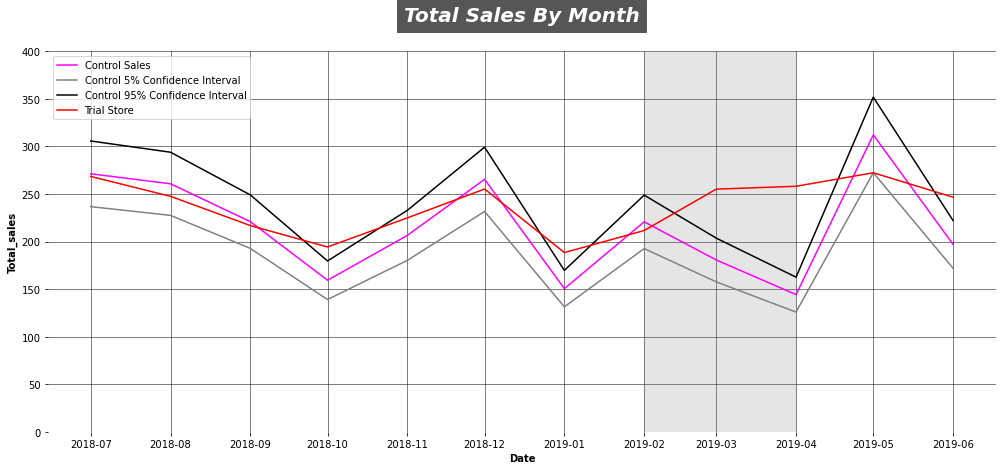

In [63]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy,ci=15,ax=ax, palette = colors)
ax.set_title('Total Sales By Month',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total_sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((0, 400))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.savefig('trial77_sales_assesment.png')

plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period. The trial store performance lies outside the 5% and 95% confidence intervals in the two of the 3 trial months.

In [64]:
# Now let's move on to 'nCustomers'
# First, compute scaling factor
# Let's call this variable 'scalingFactorCustomers'

trial_customers = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'MONTHLY_NO_CUSTOMERS'].sum()
control_customers = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_1', 'MONTHLY_NO_CUSTOMERS'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

1.0217391304347827

In [65]:
scaledControlCustomers = metrics
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [66]:
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
2695,233,201807,271.2,47,1.042553,2018-07-01
2696,233,201808,260.7,44,1.022727,2018-08-01
2697,233,201809,220.9,40,1.075000,2018-09-01
2698,233,201810,159.3,32,1.000000,2018-10-01
2699,233,201811,206.5,39,1.025641,2018-11-01


In [67]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['MONTHLY_NO_CUSTOMERS'] * scalingFactorCustomers
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlCustomers
2695,233,201807,271.2,47,1.042553,2018-07-01,48.021739
2696,233,201808,260.7,44,1.022727,2018-08-01,44.956522
2697,233,201809,220.9,40,1.075000,2018-09-01,40.869565
2698,233,201810,159.3,32,1.000000,2018-10-01,32.695652
2699,233,201811,206.5,39,1.025641,2018-11-01,39.847826


In [68]:
# Create 'percentageDiff' datasetsetframe
percentageDiff = scaledControlCustomers[['YEAR_MONTH', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = metrics.loc[metrics['STORE_NBR'] == trial_store, 'MONTHLY_NO_CUSTOMERS']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'trialCustomers'}, inplace = True)

percentageDiff

,YEAR_MONTH,controlCustomers,trialCustomers
0,201807,48.021739,47
1,201808,44.956522,46
2,201809,40.869565,40
3,201810,32.695652,36
4,201811,39.847826,39
5,201812,43.934783,43
6,201901,31.673913,31
7,201902,42.913043,40
8,201903,35.760870,46
9,201904,27.586957,47


In [69]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff

,YEAR_MONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,48.021739,47,0.021277
1,201808,44.956522,46,0.023211
2,201809,40.869565,40,0.021277
3,201810,32.695652,36,0.101064
4,201811,39.847826,39,0.021277
5,201812,43.934783,43,0.021277
6,201901,31.673913,31,0.021277
7,201902,42.913043,40,0.067882
8,201903,35.760870,46,0.286322
9,201904,27.586957,47,0.703704


In [70]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.030043543491747902

In [71]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7     2.259470
8     9.530240
9    23.422793
Name: tValue, dtype: float64

In [72]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlCustomers' from 'scaledControlCustomers' datasetsetframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TXN_MONTH', 'controlCustomers']]
controlCustomers.set_index('TXN_MONTH', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TXN_MONTH,
2018-07-01,48.021739
2018-08-01,44.956522
2018-09-01,40.869565
2018-10-01,32.695652
2018-11-01,39.847826
2018-12-01,43.934783
2019-01-01,31.673913
2019-02-01,42.913043
2019-03-01,35.760870


In [73]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [74]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialCustomers = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
trialCustomers.set_index('TXN_MONTH', inplace = True)
trialCustomers.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TXN_MONTH,
2018-07-01,47
2018-08-01,46
2018-09-01,40
2018-10-01,36
2018-11-01,39
2018-12-01,43
2019-01-01,31
2019-02-01,40
2019-03-01,46


In [75]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

# Comment: We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April

1.8945786050613054

In [76]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,48.021739,45.136253,50.907226
2018-08-01,44.956522,42.255215,47.657828
2018-09-01,40.869565,38.413832,43.325298
2018-10-01,32.695652,30.731066,34.660239
2018-11-01,39.847826,37.453486,42.242166
2018-12-01,43.934783,41.294870,46.574696
2019-01-01,31.673913,29.770720,33.577106
2019-02-01,42.913043,40.334524,45.491563
2019-03-01,35.760870,33.612103,37.909636


In [77]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
TXN_MONTH,,,,
2018-07-01,48.021739,45.136253,50.907226,47
2018-08-01,44.956522,42.255215,47.657828,46
2018-09-01,40.869565,38.413832,43.325298,40
2018-10-01,32.695652,30.731066,34.660239,36
2018-11-01,39.847826,37.453486,42.242166,39
2018-12-01,43.934783,41.294870,46.574696,43
2019-01-01,31.673913,29.770720,33.577106,31
2019-02-01,42.913043,40.334524,45.491563,40
2019-03-01,35.760870,33.612103,37.909636,46


In [78]:
tidy_1 = combineCustomers.stack().reset_index().rename(columns = {'level_1':'columns', 0:'values'})

tidy_1.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control Customers,48.021739
1,2018-07-01,Control 5% Confidence Interval,45.136253
2,2018-07-01,Control 95% Confidence Interval,50.907226
3,2018-07-01,Trial Customers,47.000000
4,2018-08-01,Control Customers,44.956522


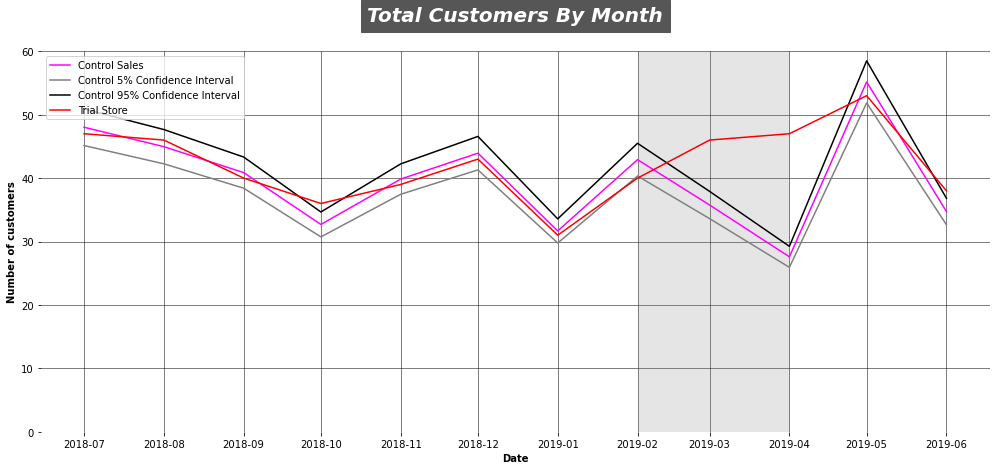

In [79]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_1,ci=95,ax=ax, palette = colors)
ax.set_title('Total Customers By Month',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Number of customers',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((0, 60))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.savefig('trial77_customers_assesment.png')

plt.show()

The number of customers is significantly higher in two of the three trial months, March and April to be precise. This seems to suggest that the trial had a significant impact in increasing the number of total sales in two of the three months based on the increase in customers in the trial period

# Selecting control store for trial 86

In [206]:
pretrialperiod

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01
...,...,...,...,...,...,...,...
3155,272,201809,294.5,31,1.129032,Other Stores,2018-09-01
3156,272,201810,405.1,41,1.146341,Other Stores,2018-10-01
3157,272,201811,355.8,39,1.102564,Other Stores,2018-11-01
3158,272,201812,363.1,43,1.000000,Other Stores,2018-12-01


In [370]:
# Compute correlation with trial store 86
trial_store = 86
corr_nSales = calculateCorrelation(pretrialperiod, 'MONTHLY_TOTAL_SALES', trial_store)
corr_nCustomers = calculateCorrelation(pretrialperiod, 'MONTHLY_NO_CUSTOMERS', trial_store)

# Compute magnitude with trial store 86
magnitude_nSales = calculateMagnitudeDistance(pretrialperiod, 'MONTHLY_TOTAL_SALES', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(pretrialperiod, 'MONTHLY_NO_CUSTOMERS', trial_store)

In [371]:
# Concatenate the scores together for 'nSales'

score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)

In [372]:
score_nSales['scoreNSales'] = score_nSales[['Correlation','Magnitude']].mean(axis=1)

score_nSales.head()

,Store1,Store2,Correlation,Magnitude,scoreNSales
0,86.0,1.0,0.381789,0.487354,0.434572
1,86.0,2.0,-0.425954,0.318817,-0.053568
2,86.0,3.0,0.314766,0.532479,0.423623
3,86.0,4.0,0.038219,0.561920,0.300070
4,86.0,5.0,0.453301,0.575044,0.514173


In [373]:
# Now do the same for 'nCustomers'

score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.398389,0.583851
1,86.0,2.0,0.014332,0.392857
2,86.0,3.0,0.179507,0.489796
3,86.0,4.0,-0.014436,0.571429
4,86.0,5.0,0.104030,0.658385


In [374]:
score_nCustomers['scoreNCust'] = score_nCustomers[['Correlation','Magnitude']].mean(axis=1)

score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude,scoreNCust
0,86.0,1.0,0.398389,0.583851,0.491120
1,86.0,2.0,0.014332,0.392857,0.203595
2,86.0,3.0,0.179507,0.489796,0.334651
3,86.0,4.0,-0.014436,0.571429,0.278496
4,86.0,5.0,0.104030,0.658385,0.381208


In [375]:
# Index both 'score_nSales' and 'score_nCustomers' datasetsetframe

score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)

In [376]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCust']], axis = 1)
score_Control

scoreNSales  scoreNCust
Store1 Store2                         
86.0   1.0        0.434572    0.491120
       2.0       -0.053568    0.203595
       3.0        0.423623    0.334651
       4.0        0.300070    0.278496
       5.0        0.514173    0.381208
...                    ...         ...
       268.0     -0.062233    0.315299
       269.0      0.661112    0.463674
       270.0     -0.128186   -0.082350
       271.0      0.585864    0.384637
       272.0      0.474996    0.091935

[259 rows x 2 columns]

In [377]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = (score_Control['scoreNSales'] + score_Control['scoreNCust'])*0.5
score_Control.head()

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
86.0   1.0        0.434572    0.491120           0.462846
       2.0       -0.053568    0.203595           0.075013
       3.0        0.423623    0.334651           0.379137
       4.0        0.300070    0.278496           0.289283
       5.0        0.514173    0.381208           0.447690

In [378]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head(6)

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
86.0   86.0       1.000000    1.000000           1.000000
       155.0      0.795904    0.621564           0.708734
       114.0      0.687785    0.668772           0.678278
       56.0       0.606487    0.673468           0.639978
       181.0      0.661238    0.615172           0.638205
       260.0      0.609849    0.606909           0.608379

In [379]:
# Set control store 155 as 'control_store'

control_store = 155

In [380]:
# Create a new datasetsetframe 'pastSales'
pastSales = pretrialperiod

# Create a new column within 'pastSales' which categorises store type
store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == 155:
        store_type.append('Control Store_1')      
    elif i == 114:
        store_type.append('Control Store_2')
    elif i == 56:
        store_type.append('Control Store_3')
    elif i == 181:
        store_type.append('Control Store_4')  
    elif i == 260:
        store_type.append('Control Store_5')     
    
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01


In [381]:
# Currently 'YEARMONTH' is an int64 so we need to turn it into a datetime variable to able to plot
# Create a new column 'TXN_MONTH'

pastSales['TXN_MONTH'] = pd.to_datetime(pastSales['YEAR_MONTH'].astype(str), format = '%Y%m')

pastSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01


In [382]:
# Now create 'MONTHLY_TOTAL_SALES' visualisation for control store, trial store and other stores


# First create relevant datasetframes 
controlSalesPlot_1 = pastSales.loc[pastSales['store_type'] == 'Control Store_1', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_1.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_1.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_1'}, inplace = True)

controlSalesPlot_2 = pastSales.loc[pastSales['store_type'] == 'Control Store_2', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_2.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_2.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_2'}, inplace = True)

controlSalesPlot_3 = pastSales.loc[pastSales['store_type'] == 'Control Store_3', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_3.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_3.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_3'}, inplace = True)

controlSalesPlot_4 = pastSales.loc[pastSales['store_type'] == 'Control Store_4', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_4.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_4.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_4'}, inplace = True)

controlSalesPlot_5 = pastSales.loc[pastSales['store_type'] == 'Control Store_5', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_5.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_5.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_5'}, inplace = True)

trialSalesPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
trialSalesPlot.set_index('TXN_MONTH', inplace = True)
trialSalesPlot.rename(columns = {'MONTHLY_TOTAL_SALES': 'Trial Store'}, inplace = True)

otherSalesPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TXN_MONTH').MONTHLY_TOTAL_SALES.mean())
otherSalesPlot.rename(columns = {'MONTHLY_TOTAL_SALES': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot_1 = pd.concat([controlSalesPlot_1, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_2 = pd.concat([controlSalesPlot_2, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_3 = pd.concat([controlSalesPlot_3, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_4 = pd.concat([controlSalesPlot_4, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_5 = pd.concat([controlSalesPlot_5, trialSalesPlot, otherSalesPlot], axis = 1)

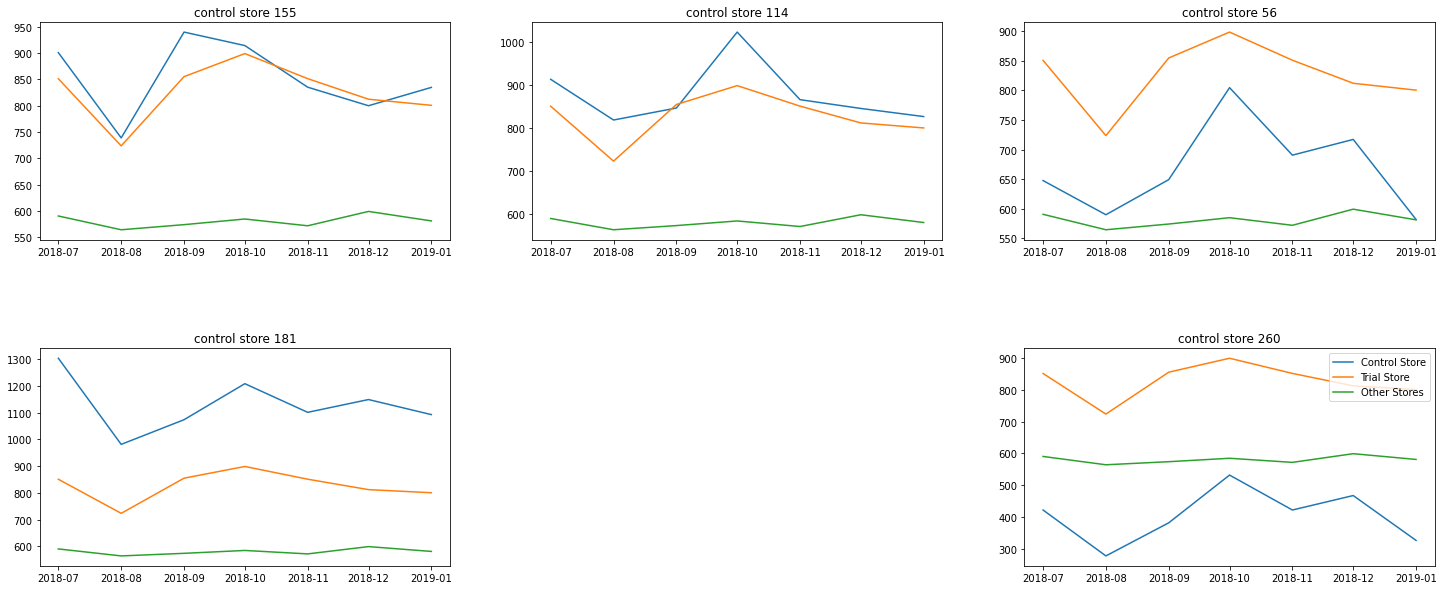

In [383]:
fig,ax = plt.subplots(2,3,figsize=(25,10))
ax[1][1].set_visible(False)


ax[0,0].plot(combineSalesPlot_1)
ax[0,0].set_title('control store 155')

ax[0,1].plot(combineSalesPlot_2)
ax[0,1].set_title('control store 114')

ax[0,2].plot(combineSalesPlot_3)
ax[0,2].set_title('control store 56')

ax[1,0].plot(combineSalesPlot_4)
ax[1,0].set_title('control store 181')

ax[1,2].plot(combineSalesPlot_5)
ax[1,2].set_title('control store 260')

# Set legend
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 1)

fig.subplots_adjust(hspace=.5)


plt.savefig('trial86_sales5.png')



plt.show()

In [384]:
# Do the same for 'nCustomers' 

# First create relevant datasetframes 
controlCustomersPlot_1 = pastSales.loc[pastSales['store_type'] == 'Control Store_1', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_1.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_1.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_1'}, inplace = True)

controlCustomersPlot_2 = pastSales.loc[pastSales['store_type'] == 'Control Store_2', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_2.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_2.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_2'}, inplace = True)

controlCustomersPlot_3 = pastSales.loc[pastSales['store_type'] == 'Control Store_3', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_3.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_3.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_3'}, inplace = True)

controlCustomersPlot_4 = pastSales.loc[pastSales['store_type'] == 'Control Store_4', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_4.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_4.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_4'}, inplace = True)

controlCustomersPlot_5 = pastSales.loc[pastSales['store_type'] == 'Control Store_5', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_5.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_5.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_5'}, inplace = True)

trialCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
trialCustomersPlot.set_index('TXN_MONTH', inplace = True)
trialCustomersPlot.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Trial Store'}, inplace = True)

otherCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TXN_MONTH').MONTHLY_NO_CUSTOMERS.mean())
otherCustomersPlot.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot_1 = pd.concat([controlCustomersPlot_1, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_2 = pd.concat([controlCustomersPlot_2, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_3 = pd.concat([controlCustomersPlot_3, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_4 = pd.concat([controlCustomersPlot_4, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_5 = pd.concat([controlCustomersPlot_5, trialCustomersPlot, otherCustomersPlot], axis = 1)


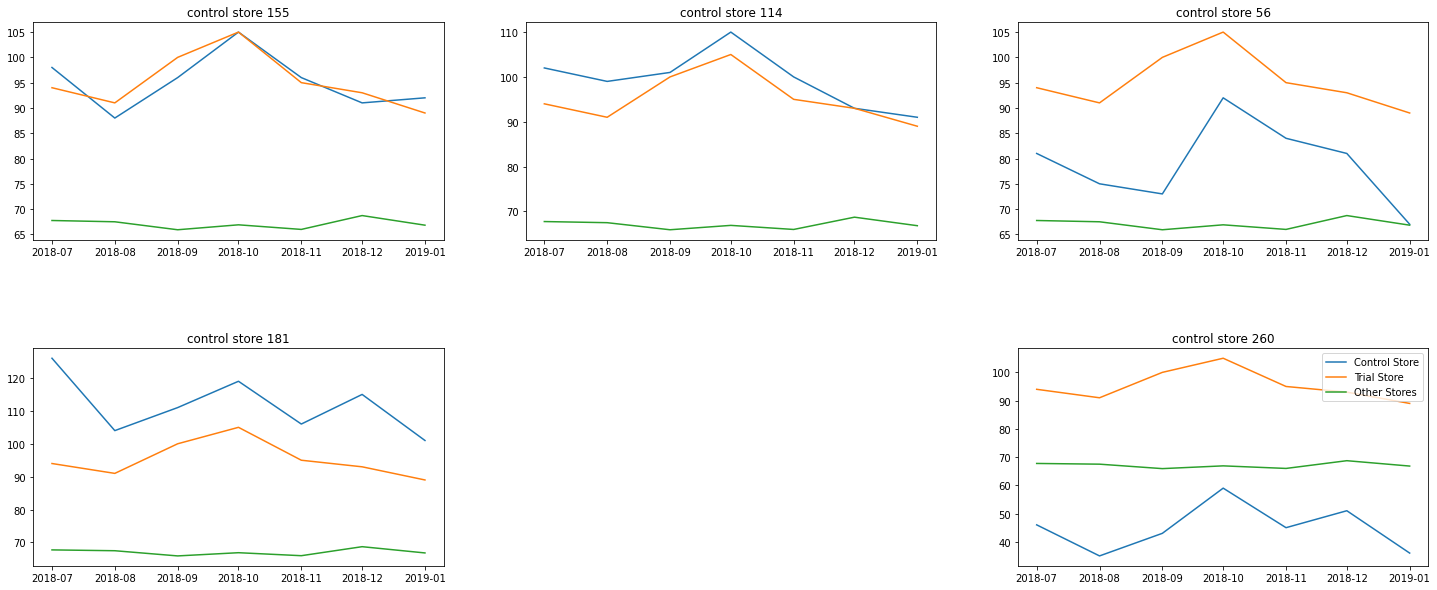

In [385]:
fig,ax = plt.subplots(2,3,figsize=(25,10))
ax[1][1].set_visible(False)


ax[0,0].plot(combineCustomersPlot_1)
ax[0,0].set_title('control store 155')

ax[0,1].plot(combineCustomersPlot_2)
ax[0,1].set_title('control store 114')

ax[0,2].plot(combineCustomersPlot_3)
ax[0,2].set_title('control store 56')

ax[1,0].plot(combineCustomersPlot_4)
ax[1,0].set_title('control store 181')

ax[1,2].plot(combineCustomersPlot_5)
ax[1,2].set_title('control store 260')

# Set legend
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 1)

fig.subplots_adjust(hspace=.5)


plt.savefig('trial86_customers5.png')


plt.show()

# Assessment for trial for trial store 86

In [386]:
# First we need to work out a scaling factor to applied to the control store
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store
# Let's call this variable 'scalingFactorSales'

trial_sum = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'MONTHLY_TOTAL_SALES'].sum()
control_sum = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_1', 'MONTHLY_TOTAL_SALES'].sum()
scalingFactorSales = trial_sum / control_sum
scalingFactorSales

0.9715042852590444

In [387]:
# Create a new datasetsetframe 'scaledControlSales'
# Recall our datasetsetframe before filtering out the trial period is called 'measureOverTime'

metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [388]:
# Create datasetsetframe and reset index

scaledControlSales = metrics
scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [389]:
# We only want control store i.e. store 155

scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
1792,155,201807,900.6,98,1.214286,2018-07-01
1793,155,201808,738.7,88,1.284091,2018-08-01
1794,155,201809,939.6,96,1.354167,2018-09-01
1795,155,201810,914.0,105,1.219048,2018-10-01
1796,155,201811,835.0,96,1.270833,2018-11-01
1797,155,201812,799.8,91,1.230769,2018-12-01
1798,155,201901,834.6,92,1.271739,2019-01-01
1799,155,201902,850.8,92,1.271739,2019-02-01
1800,155,201903,767.0,91,1.208791,2019-03-01
1801,155,201904,800.4,93,1.215054,2019-04-01


In [390]:
# Create 'controlSales' which applies 'scalingFactorSales' to 'totSales' column

scaledControlSales['controlSales'] = scaledControlSales['MONTHLY_TOTAL_SALES'] * scalingFactorSales
scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlSales
1792,155,201807,900.6,98,1.214286,2018-07-01,874.936759
1793,155,201808,738.7,88,1.284091,2018-08-01,717.650216
1794,155,201809,939.6,96,1.354167,2018-09-01,912.825426
1795,155,201810,914.0,105,1.219048,2018-10-01,887.954917
1796,155,201811,835.0,96,1.270833,2018-11-01,811.206078


In [391]:
# Create 'percentageDiff' datasetsetframe
percentageDiff = scaledControlSales[['YEAR_MONTH', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'totSales'
trialSales = metrics.loc[metrics['STORE_NBR'] == trial_store, 'MONTHLY_TOTAL_SALES']
trialSales.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'MONTHLY_TOTAL_SALES': 'trialSales'}, inplace = True)

In [392]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,YEAR_MONTH,controlSales,trialSales,percentageDiff
0,201807,874.936759,851.0,0.027358
1,201808,717.650216,723.6,0.008291
2,201809,912.825426,855.0,0.063348
3,201810,887.954917,898.8,0.012214
4,201811,811.206078,851.2,0.049302
5,201812,777.009127,812.2,0.045290
6,201901,810.817476,800.6,0.012601
7,201902,826.555846,872.8,0.055948
8,201903,745.143787,945.4,0.268748
9,201904,777.592030,804.0,0.033961


In [393]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.021624344726330527

In [394]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7     2.587270
8    12.428049
9     1.570508
Name: tValue, dtype: float64

In [395]:
# Recall our 'scaledControlSales' datasetsetframe

scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlSales
1792,155,201807,900.6,98,1.214286,2018-07-01,874.936759
1793,155,201808,738.7,88,1.284091,2018-08-01,717.650216
1794,155,201809,939.6,96,1.354167,2018-09-01,912.825426
1795,155,201810,914.0,105,1.219048,2018-10-01,887.954917
1796,155,201811,835.0,96,1.270833,2018-11-01,811.206078


In [396]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TXN_MONTH'] = pd.to_datetime(scaledControlSales['YEAR_MONTH'].astype(str), format = '%Y%m')
scaledControlSales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlSales
1792,155,201807,900.6,98,1.214286,2018-07-01,874.936759
1793,155,201808,738.7,88,1.284091,2018-08-01,717.650216
1794,155,201809,939.6,96,1.354167,2018-09-01,912.825426
1795,155,201810,914.0,105,1.219048,2018-10-01,887.954917
1796,155,201811,835.0,96,1.270833,2018-11-01,811.206078
1797,155,201812,799.8,91,1.230769,2018-12-01,777.009127
1798,155,201901,834.6,92,1.271739,2019-01-01,810.817476
1799,155,201902,850.8,92,1.271739,2019-02-01,826.555846
1800,155,201903,767.0,91,1.208791,2019-03-01,745.143787
1801,155,201904,800.4,93,1.215054,2019-04-01,777.592030


In [397]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlSales' from 'scaledControlSales' datasetsetframe for control store 

controlSales = scaledControlSales.loc[:, ['TXN_MONTH', 'controlSales']]
controlSales.set_index('TXN_MONTH', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)

In [398]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [399]:
# Create a new column 'TransationMonth' under 'measureOverTime' datasetsetframe

metrics['TXN_MONTH'] = pd.to_datetime(metrics['YEAR_MONTH'].astype(str), format = '%Y%m')
metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [400]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

# Comment: We cdan see that the t-value is much larger than the 95th percentile value of the t-distribution for March Only

1.8945786050613054

In [401]:
# Extract 'totSales' for trial store from 'measureOverTime'

trialSales = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
trialSales.set_index('TXN_MONTH', inplace = True)
trialSales.rename(columns = {'MONTHLY_TOTAL_SALES': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TXN_MONTH,
2018-07-01,851.0
2018-08-01,723.6
2018-09-01,855.0
2018-10-01,898.8
2018-11-01,851.2
2018-12-01,812.2
2019-01-01,800.6
2019-02-01,872.8
2019-03-01,945.4


In [402]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,874.936759,837.096891,912.776627
2018-08-01,717.650216,686.612784,748.687647
2018-09-01,912.825426,873.346923,952.303930
2018-10-01,887.954917,849.552030,926.357803
2018-11-01,811.206078,776.122478,846.289678
2018-12-01,777.009127,743.404501,810.613754
2019-01-01,810.817476,775.750683,845.884270
2019-02-01,826.555846,790.808389,862.303303
2019-03-01,745.143787,712.917295,777.370279


In [403]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TXN_MONTH,,,,
2018-07-01,874.936759,837.096891,912.776627,851.0
2018-08-01,717.650216,686.612784,748.687647,723.6
2018-09-01,912.825426,873.346923,952.303930,855.0
2018-10-01,887.954917,849.552030,926.357803,898.8
2018-11-01,811.206078,776.122478,846.289678,851.2
2018-12-01,777.009127,743.404501,810.613754,812.2
2019-01-01,810.817476,775.750683,845.884270,800.6
2019-02-01,826.555846,790.808389,862.303303,872.8
2019-03-01,745.143787,712.917295,777.370279,945.4


In [404]:
tidy_2 = combineSales.stack().reset_index().rename(columns = {'level_1':'columns', 0:'values'})

tidy_2.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control Sales,874.936759
1,2018-07-01,Control 5% Confidence Interval,837.096891
2,2018-07-01,Control 95% Confidence Interval,912.776627
3,2018-07-01,Trial Sales,851.000000
4,2018-08-01,Control Sales,717.650216


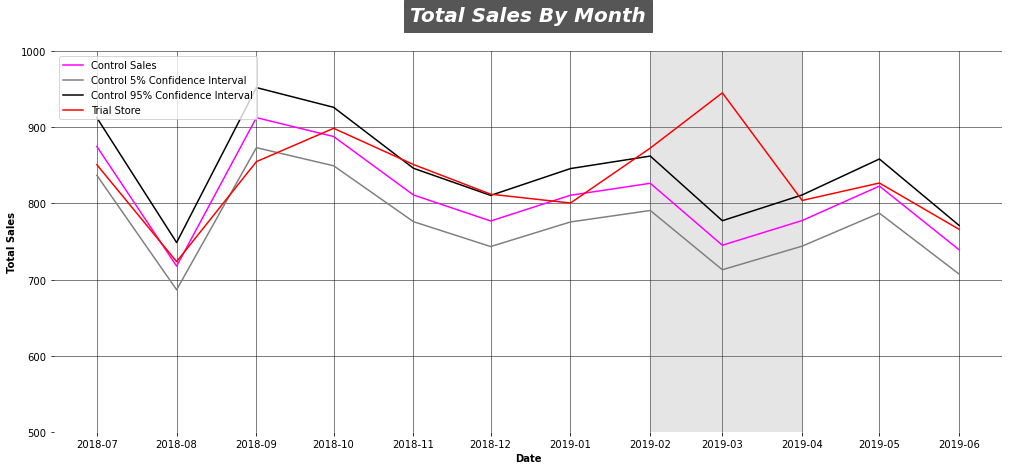

In [405]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_2,ci=95,ax=ax, palette = colors)
ax.set_title('Total Sales By Month',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total Sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((500, 1000))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

plt.savefig('trial86_sales_assessment.png')

plt.show()

The results show that the trial in store 86 is significantly different to its control store in the trial period. The trial store performance lies outside the 5% to 95% confidence interval of the control store in the first two months of the trial period.

In [406]:
# Now let's move on to 'nCustomers'
# First, compute scaling factor
# Let's call this variable 'scalingFactorCustomers'

trial_customers = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'MONTHLY_NO_CUSTOMERS'].sum()
control_customers = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_1', 'MONTHLY_NO_CUSTOMERS'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

1.0015015015015014

In [407]:
scaledControlCustomers = metrics
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [408]:
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
1792,155,201807,900.6,98,1.214286,2018-07-01
1793,155,201808,738.7,88,1.284091,2018-08-01
1794,155,201809,939.6,96,1.354167,2018-09-01
1795,155,201810,914.0,105,1.219048,2018-10-01
1796,155,201811,835.0,96,1.270833,2018-11-01


In [409]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['MONTHLY_NO_CUSTOMERS'] * scalingFactorCustomers
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlCustomers
1792,155,201807,900.6,98,1.214286,2018-07-01,98.147147
1793,155,201808,738.7,88,1.284091,2018-08-01,88.132132
1794,155,201809,939.6,96,1.354167,2018-09-01,96.144144
1795,155,201810,914.0,105,1.219048,2018-10-01,105.157658
1796,155,201811,835.0,96,1.270833,2018-11-01,96.144144


In [410]:
# Create 'percentageDiff' datasetsetframe
percentageDiff = scaledControlCustomers[['YEAR_MONTH', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = metrics.loc[metrics['STORE_NBR'] == trial_store, 'MONTHLY_NO_CUSTOMERS']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'trialCustomers'}, inplace = True)

percentageDiff

,YEAR_MONTH,controlCustomers,trialCustomers
0,201807,98.147147,94
1,201808,88.132132,91
2,201809,96.144144,100
3,201810,105.157658,105
4,201811,96.144144,95
5,201812,91.136637,93
6,201901,92.138138,89
7,201902,92.138138,105
8,201903,91.136637,108
9,201904,93.139640,99


In [411]:

# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff

,YEAR_MONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,98.147147,94,0.042254
1,201808,88.132132,91,0.032541
2,201809,96.144144,100,0.040105
3,201810,105.157658,105,0.001499
4,201811,96.144144,95,0.011900
5,201812,91.136637,93,0.020446
6,201901,92.138138,89,0.034059
7,201902,92.138138,105,0.139593
8,201903,91.136637,108,0.185034
9,201904,93.139640,99,0.062920


In [412]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.01527921491251845

In [413]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7     9.136153
8    12.110168
9     4.118023
Name: tValue, dtype: float64

In [414]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlCustomers' from 'scaledControlCustomers' datasetsetframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TXN_MONTH', 'controlCustomers']]
controlCustomers.set_index('TXN_MONTH', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TXN_MONTH,
2018-07-01,98.147147
2018-08-01,88.132132
2018-09-01,96.144144
2018-10-01,105.157658
2018-11-01,96.144144
2018-12-01,91.136637
2019-01-01,92.138138
2019-02-01,92.138138
2019-03-01,91.136637


In [415]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialCustomers = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
#trialCustomers.set_index('TXN_MONTH', inplace = True)
trialCustomers.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Trial Customers'}, inplace = True)
trialCustomers.reset_index(drop=True, inplace=True)

trialCustomers

,TXN_MONTH,Trial Customers
0,2018-07-01,94
1,2018-08-01,91
2,2018-09-01,100
3,2018-10-01,105
4,2018-11-01,95
5,2018-12-01,93
6,2019-01-01,89
7,2019-02-01,105
8,2019-03-01,108
9,2019-04-01,99


In [416]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)

controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,98.147147,95.147924,101.146370
2018-08-01,88.132132,85.438953,90.825312
2018-09-01,96.144144,93.206130,99.082158
2018-10-01,105.157658,101.944205,108.371111
2018-11-01,96.144144,93.206130,99.082158
2018-12-01,91.136637,88.351644,93.921629
2019-01-01,92.138138,89.322541,94.953735
2019-02-01,92.138138,89.322541,94.953735
2019-03-01,91.136637,88.351644,93.921629


In [417]:
combineCustomers = pd.merge(controlCustomers,trialCustomers, on='TXN_MONTH')

combineCustomers.set_index('TXN_MONTH', inplace = True)

combineCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
TXN_MONTH,,,,
2018-07-01,98.147147,95.147924,101.146370,94
2018-08-01,88.132132,85.438953,90.825312,91
2018-09-01,96.144144,93.206130,99.082158,100
2018-10-01,105.157658,101.944205,108.371111,105
2018-11-01,96.144144,93.206130,99.082158,95
2018-12-01,91.136637,88.351644,93.921629,93
2019-01-01,92.138138,89.322541,94.953735,89
2019-02-01,92.138138,89.322541,94.953735,105
2019-03-01,91.136637,88.351644,93.921629,108


In [418]:
tidy_3 = combineCustomers.stack().reset_index().rename(columns={'level_1':'columns', 0:'values'})

tidy_3.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control Customers,98.147147
1,2018-07-01,Control 5% Confidence Interval,95.147924
2,2018-07-01,Control 95% Confidence Interval,101.146370
3,2018-07-01,Trial Customers,94.000000
4,2018-08-01,Control Customers,88.132132


In [419]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

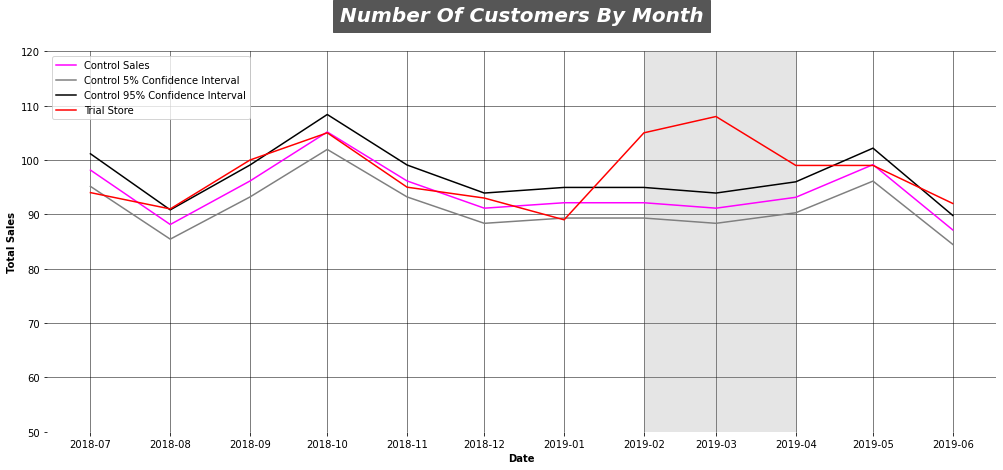

In [420]:
fig,ax= plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_3,ci=95,ax=ax, palette = colors)
ax.set_title('Number Of Customers By Month',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total Sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((50, 120))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)


plt.savefig('trial86_customers_assessment.png')

plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

In [421]:
# Now let's move on to 'Average Transaction per customer'


# First, compute scaling factor
# Let's call this variable 'scalingFactorAVG_NO_TXN'

trial_AVG_NO_TXN = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'AVG_NO_TXN'].sum()
control_AVG_NO_TXN = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_3', 'AVG_NO_TXN'].sum()
scalingFactorAVG_NO_TXN = trial_AVG_NO_TXN / trial_AVG_NO_TXN
scalingFactorAVG_NO_TXN

1.0

In [422]:
scaledControlAVG_NO_TXN = metrics
scaledControlAVG_NO_TXN.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [423]:
scaledControlAVG_NO_TXN = scaledControlAVG_NO_TXN.loc[scaledControlAVG_NO_TXN['STORE_NBR'] == control_store]
scaledControlAVG_NO_TXN.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
1792,155,201807,900.6,98,1.214286,2018-07-01
1793,155,201808,738.7,88,1.284091,2018-08-01
1794,155,201809,939.6,96,1.354167,2018-09-01
1795,155,201810,914.0,105,1.219048,2018-10-01
1796,155,201811,835.0,96,1.270833,2018-11-01


In [424]:
scaledControlAVG_NO_TXN['control_AVG_NO_TXN'] = scaledControlAVG_NO_TXN['AVG_NO_TXN'] * scalingFactorAVG_NO_TXN
scaledControlAVG_NO_TXN.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,control_AVG_NO_TXN
1792,155,201807,900.6,98,1.214286,2018-07-01,1.214286
1793,155,201808,738.7,88,1.284091,2018-08-01,1.284091
1794,155,201809,939.6,96,1.354167,2018-09-01,1.354167
1795,155,201810,914.0,105,1.219048,2018-10-01,1.219048
1796,155,201811,835.0,96,1.270833,2018-11-01,1.270833


In [425]:
# Create 'percentageDiff' datasetsetframe
percentageDiff = scaledControlAVG_NO_TXN[['YEAR_MONTH', 'control_AVG_NO_TXN']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trial_AVG_NO_TXN = metrics.loc[metrics['STORE_NBR'] == trial_store, 'AVG_NO_TXN']
trial_AVG_NO_TXN.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trial_AVG_NO_TXN], axis = 1)
percentageDiff.rename(columns = {'AVG_NO_TXN': 'trial_AVG_NO_TXN'}, inplace = True)

percentageDiff

,YEAR_MONTH,control_AVG_NO_TXN,trial_AVG_NO_TXN
0,201807,1.214286,1.276596
1,201808,1.284091,1.131868
2,201809,1.354167,1.200000
3,201810,1.219048,1.238095
4,201811,1.270833,1.242105
5,201812,1.230769,1.236559
6,201901,1.271739,1.348315
7,201902,1.271739,1.238095
8,201903,1.208791,1.175926
9,201904,1.215054,1.202020


In [426]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.control_AVG_NO_TXN - percentageDiff.trial_AVG_NO_TXN) / percentageDiff.control_AVG_NO_TXN
percentageDiff

,YEAR_MONTH,control_AVG_NO_TXN,trial_AVG_NO_TXN,percentageDiff
0,201807,1.214286,1.276596,0.051314
1,201808,1.284091,1.131868,0.118545
2,201809,1.354167,1.200000,0.113846
3,201810,1.219048,1.238095,0.015625
4,201811,1.270833,1.242105,0.022606
5,201812,1.230769,1.236559,0.004704
6,201901,1.271739,1.348315,0.060213
7,201902,1.271739,1.238095,0.026455
8,201903,1.208791,1.175926,0.027189
9,201904,1.215054,1.202020,0.010727


In [427]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.04595390756666439

In [428]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [429]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7    0.575686
8    0.591648
9    0.233424
Name: tValue, dtype: float64

In [430]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

# Comment: We can see that the t-value is larger than the 95th percentile value of the t-distribution 

1.8945786050613054

In [431]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlCustomers' from 'scaledControlCustomers' datasetsetframe for control store 

controlAVG_NO_TXN = scaledControlAVG_NO_TXN.loc[:, ['TXN_MONTH', 'control_AVG_NO_TXN']]
controlAVG_NO_TXN.set_index('TXN_MONTH', inplace = True)
controlAVG_NO_TXN.rename(columns = {'control_AVG_NO_TXN': 'Control AVG_NO_TXN'}, inplace = True)
controlAVG_NO_TXN

,Control AVG_NO_TXN
TXN_MONTH,
2018-07-01,1.214286
2018-08-01,1.284091
2018-09-01,1.354167
2018-10-01,1.219048
2018-11-01,1.270833
2018-12-01,1.230769
2019-01-01,1.271739
2019-02-01,1.271739
2019-03-01,1.208791


In [432]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialAVG_NO_TXN = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'AVG_NO_TXN']]
trialAVG_NO_TXN.set_index('TXN_MONTH', inplace = True)
trialAVG_NO_TXN.rename(columns = {'AVG_NO_TXN': 'Trial AVG_NO_TXN'}, inplace = True)
trialAVG_NO_TXN

,Trial AVG_NO_TXN
TXN_MONTH,
2018-07-01,1.276596
2018-08-01,1.131868
2018-09-01,1.200000
2018-10-01,1.238095
2018-11-01,1.242105
2018-12-01,1.236559
2019-01-01,1.348315
2019-02-01,1.238095
2019-03-01,1.175926


In [433]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlAVG_NO_TXN['Control 5% Confidence Interval'] = controlAVG_NO_TXN['Control AVG_NO_TXN'] * (1 - stdDev*2)
controlAVG_NO_TXN['Control 95% Confidence Interval'] = controlAVG_NO_TXN['Control AVG_NO_TXN'] * (1 + stdDev*2)
controlAVG_NO_TXN

,Control AVG_NO_TXN,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,1.214286,1.102683,1.325888
2018-08-01,1.284091,1.166073,1.402109
2018-09-01,1.354167,1.229708,1.478625
2018-10-01,1.219048,1.107008,1.331088
2018-11-01,1.270833,1.154034,1.387633
2018-12-01,1.230769,1.117652,1.343887
2019-01-01,1.271739,1.154856,1.388622
2019-02-01,1.271739,1.154856,1.388622
2019-03-01,1.208791,1.097694,1.319889


In [434]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineAVG_NO_TXN = pd.merge(controlAVG_NO_TXN, trialAVG_NO_TXN, left_index = True, right_index = True)
combineAVG_NO_TXN

,Control AVG_NO_TXN,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial AVG_NO_TXN
TXN_MONTH,,,,
2018-07-01,1.214286,1.102683,1.325888,1.276596
2018-08-01,1.284091,1.166073,1.402109,1.131868
2018-09-01,1.354167,1.229708,1.478625,1.200000
2018-10-01,1.219048,1.107008,1.331088,1.238095
2018-11-01,1.270833,1.154034,1.387633,1.242105
2018-12-01,1.230769,1.117652,1.343887,1.236559
2019-01-01,1.271739,1.154856,1.388622,1.348315
2019-02-01,1.271739,1.154856,1.388622,1.238095
2019-03-01,1.208791,1.097694,1.319889,1.175926


In [435]:
tidy_6 = combineAVG_NO_TXN.stack().reset_index().rename(columns={'level_1':'columns', 0:'values'})


tidy_6.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control AVG_NO_TXN,1.214286
1,2018-07-01,Control 5% Confidence Interval,1.102683
2,2018-07-01,Control 95% Confidence Interval,1.325888
3,2018-07-01,Trial AVG_NO_TXN,1.276596
4,2018-08-01,Control AVG_NO_TXN,1.284091


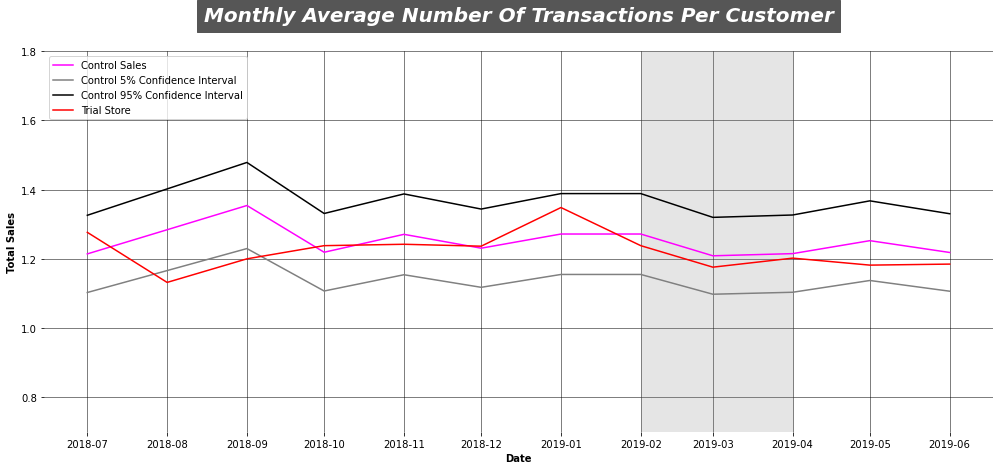

In [438]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_6,ci=95,ax=ax, palette = colors)
ax.set_title('Monthly Average Number Of Transactions Per Customer',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total Sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((0.7, 1.8))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)


plt.savefig('trial86_avg_txn_assessment.png')

plt.show()

# Selecting control store for trial store 88

In [274]:
pretrialperiod

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01
...,...,...,...,...,...,...,...
3155,272,201809,294.5,31,1.129032,Other Stores,2018-09-01
3156,272,201810,405.1,41,1.146341,Other Stores,2018-10-01
3157,272,201811,355.8,39,1.102564,Other Stores,2018-11-01
3158,272,201812,363.1,43,1.000000,Other Stores,2018-12-01


In [275]:
# Now let's use those two functions to find the control store

# Compute correlation with trial store 88
trial_store = 88
corr_nSales = calculateCorrelation(pretrialperiod, 'MONTHLY_TOTAL_SALES', trial_store)
corr_nCustomers = calculateCorrelation(pretrialperiod, 'MONTHLY_NO_CUSTOMERS', trial_store)

# Compute magnitude with trial store 88
magnitude_nSales = calculateMagnitudeDistance(pretrialperiod, 'MONTHLY_TOTAL_SALES', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(pretrialperiod, 'MONTHLY_NO_CUSTOMERS', trial_store)


In [276]:
# Let's see what they look like

corr_nSales.head()

,Store1,Store2,Correlation
0,88.0,1.0,0.844706
1,88.0,2.0,-0.262264
2,88.0,3.0,-0.385285
3,88.0,4.0,-0.496039
4,88.0,5.0,0.364314


In [277]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,88.0,1.0,0.518426
1,88.0,2.0,0.672230
2,88.0,3.0,0.415597
3,88.0,4.0,0.472361
4,88.0,5.0,0.535640


In [278]:
# Concatenate the scores together for 'nSales'

score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nSales.head()

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.844706,0.518426
1,88.0,2.0,-0.262264,0.672230
2,88.0,3.0,-0.385285,0.415597
3,88.0,4.0,-0.496039,0.472361
4,88.0,5.0,0.364314,0.535640


In [279]:
score_nSales['scoreNSales'] = score_nSales[['Correlation','Magnitude']].mean(axis=1)

score_nSales.head()

,Store1,Store2,Correlation,Magnitude,scoreNSales
0,88.0,1.0,0.844706,0.518426,0.681566
1,88.0,2.0,-0.262264,0.672230,0.204983
2,88.0,3.0,-0.385285,0.415597,0.015156
3,88.0,4.0,-0.496039,0.472361,-0.011839
4,88.0,5.0,0.364314,0.535640,0.449977


In [280]:
# Now do the same for 'nCustomers'

score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.442766,0.285714
1,88.0,2.0,-0.639671,0.302521
2,88.0,3.0,0.275887,0.590476
3,88.0,4.0,-0.243313,0.588235
4,88.0,5.0,-0.016339,0.401361


In [281]:
score_nCustomers['scoreNCust'] = score_nCustomers[['Correlation','Magnitude']].mean(axis=1)

score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude,scoreNCust
0,88.0,1.0,0.442766,0.285714,0.364240
1,88.0,2.0,-0.639671,0.302521,-0.168575
2,88.0,3.0,0.275887,0.590476,0.433181
3,88.0,4.0,-0.243313,0.588235,0.172461
4,88.0,5.0,-0.016339,0.401361,0.192511


In [282]:
# Index both 'score_nSales' and 'score_nCustomers' datasetsetframe

score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)

In [283]:
# Create a new datasetsetframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCust']], axis = 1)
score_Control

scoreNSales  scoreNCust
Store1 Store2                         
88.0   1.0        0.681566    0.364240
       2.0        0.204983   -0.168575
       3.0        0.015156    0.433181
       4.0       -0.011839    0.172461
       5.0        0.449977    0.192511
...                    ...         ...
       268.0      0.169677    0.602971
       269.0      0.223606    0.106085
       270.0     -0.073608    0.112389
       271.0      0.162556    0.288869
       272.0      0.037020    0.189805

[259 rows x 2 columns]

In [284]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = (score_Control['scoreNSales'] + score_Control['scoreNCust'])*0.5


score_Control.head()

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
88.0   1.0        0.681566    0.364240           0.522903
       2.0        0.204983   -0.168575           0.018204
       3.0        0.015156    0.433181           0.224169
       4.0       -0.011839    0.172461           0.080311
       5.0        0.449977    0.192511           0.321244

In [285]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head(6)

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
88.0   88.0       1.000000    1.000000           1.000000
       14.0       0.574350    0.694377           0.634364
       159.0      0.784671    0.403485           0.594078
       237.0      0.343221    0.842434           0.592827
       204.0      0.755840    0.393335           0.574588
       134.0      0.647795    0.487313           0.567554

In [286]:
# Let's see the top 5 stores with highest 'finalControlScore'

score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
88.0   88.0       1.000000    1.000000           1.000000
       14.0       0.574350    0.694377           0.634364
       159.0      0.784671    0.403485           0.594078
       237.0      0.343221    0.842434           0.592827
       204.0      0.755840    0.393335           0.574588

In [287]:
# Create a new datasetsetframe 'pastSales'
pastSales = pretrialperiod

# Create a new column within 'pastSales' which categorises store type
store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == 14:
        store_type.append('Control Store_1')      
    elif i == 159:
        store_type.append('Control Store_2')
    elif i == 237:
        store_type.append('Control Store_3')
    elif i == 204:
        store_type.append('Control Store_4')  
    elif i == 134:
        store_type.append('Control Store_5')     
    
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01


In [288]:
# Currently 'YEARMONTH' is an int64 so we need to turn it into a datetime variable to able to plot
# Create a new column 'TransactionMonth'

pastSales['TXN_MONTH'] = pd.to_datetime(pastSales['YEAR_MONTH'].astype(str), format = '%Y%m')

pastSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01


In [289]:
# Now create 'totSales' visualisation for control store, trial store and other stores

# First create relevant datasetframes 
controlSalesPlot_1 = pastSales.loc[pastSales['store_type'] == 'Control Store_1', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_1.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_1.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_1'}, inplace = True)

controlSalesPlot_2 = pastSales.loc[pastSales['store_type'] == 'Control Store_2', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_2.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_2.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_2'}, inplace = True)

controlSalesPlot_3 = pastSales.loc[pastSales['store_type'] == 'Control Store_3', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_3.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_3.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_3'}, inplace = True)

controlSalesPlot_4 = pastSales.loc[pastSales['store_type'] == 'Control Store_4', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_4.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_4.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_4'}, inplace = True)

controlSalesPlot_5 = pastSales.loc[pastSales['store_type'] == 'Control Store_5', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
controlSalesPlot_5.set_index('TXN_MONTH', inplace = True)
controlSalesPlot_5.rename(columns = {'MONTHLY_TOTAL_SALES': 'Control Store_5'}, inplace = True)

trialSalesPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
trialSalesPlot.set_index('TXN_MONTH', inplace = True)
trialSalesPlot.rename(columns = {'MONTHLY_TOTAL_SALES': 'Trial Store'}, inplace = True)

otherSalesPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TXN_MONTH').MONTHLY_TOTAL_SALES.mean())
otherSalesPlot.rename(columns = {'MONTHLY_TOTAL_SALES': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot_1 = pd.concat([controlSalesPlot_1, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_2 = pd.concat([controlSalesPlot_2, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_3 = pd.concat([controlSalesPlot_3, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_4 = pd.concat([controlSalesPlot_4, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot_5 = pd.concat([controlSalesPlot_5, trialSalesPlot, otherSalesPlot], axis = 1)


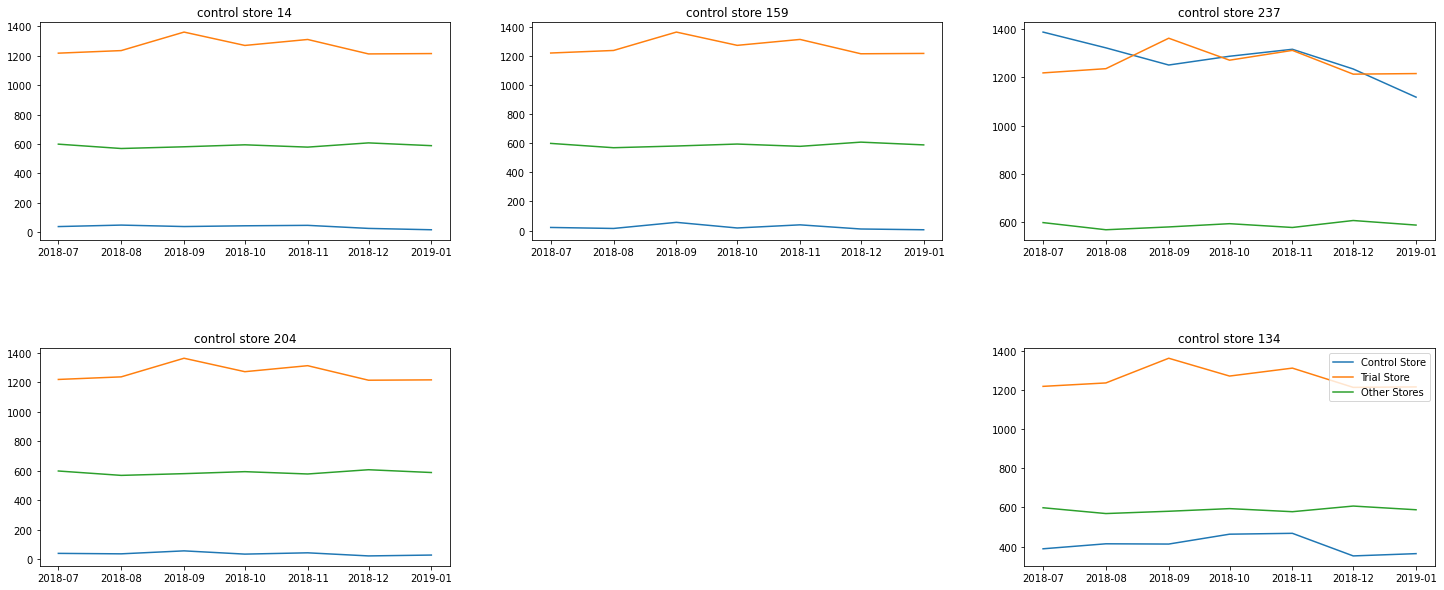

In [290]:
fig,ax = plt.subplots(2,3,figsize=(25,10))
ax[1][1].set_visible(False)


ax[0,0].plot(combineSalesPlot_1)
ax[0,0].set_title('control store 14')

ax[0,1].plot(combineSalesPlot_2)
ax[0,1].set_title('control store 159')

ax[0,2].plot(combineSalesPlot_3)
ax[0,2].set_title('control store 237')

ax[1,0].plot(combineSalesPlot_4)
ax[1,0].set_title('control store 204')

ax[1,2].plot(combineSalesPlot_5)
ax[1,2].set_title('control store 134')

# Set legend
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 1)

fig.subplots_adjust(hspace=.5)


plt.savefig('trial88_sales5.png')



plt.show()

In [291]:
# Do the same for 'nCustomers' 

# First create relevant datasetframes 
controlCustomersPlot_1 = pastSales.loc[pastSales['store_type'] == 'Control Store_1', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_1.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_1.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_1'}, inplace = True)

controlCustomersPlot_2 = pastSales.loc[pastSales['store_type'] == 'Control Store_2', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_2.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_2.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_2'}, inplace = True)

controlCustomersPlot_3 = pastSales.loc[pastSales['store_type'] == 'Control Store_3', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_3.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_3.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_3'}, inplace = True)

controlCustomersPlot_4 = pastSales.loc[pastSales['store_type'] == 'Control Store_4', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_4.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_4.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_4'}, inplace = True)

controlCustomersPlot_5 = pastSales.loc[pastSales['store_type'] == 'Control Store_5', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
controlCustomersPlot_5.set_index('TXN_MONTH', inplace = True)
controlCustomersPlot_5.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Control Store_5'}, inplace = True)

trialCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
trialCustomersPlot.set_index('TXN_MONTH', inplace = True)
trialCustomersPlot.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Trial Store'}, inplace = True)

otherCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TXN_MONTH').MONTHLY_NO_CUSTOMERS.mean())
otherCustomersPlot.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot_1 = pd.concat([controlCustomersPlot_1, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_2 = pd.concat([controlCustomersPlot_2, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_3 = pd.concat([controlCustomersPlot_3, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_4 = pd.concat([controlCustomersPlot_4, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot_5 = pd.concat([controlCustomersPlot_5, trialCustomersPlot, otherCustomersPlot], axis = 1)


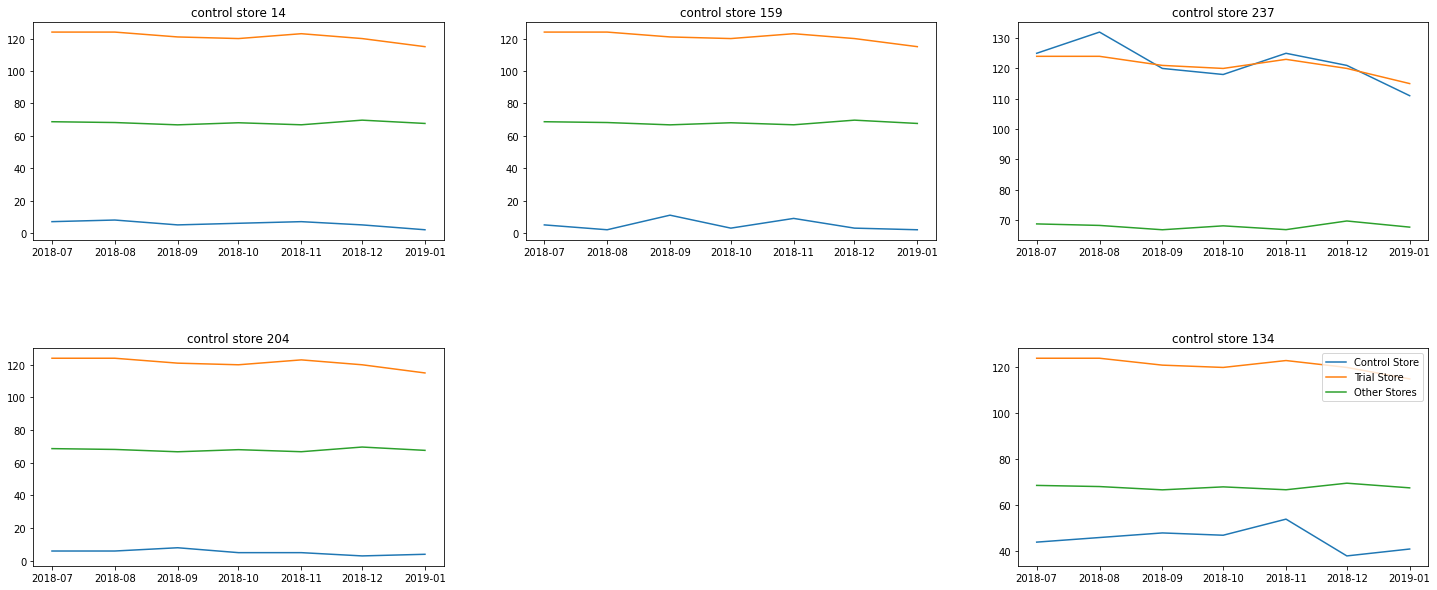

In [292]:
fig,ax = plt.subplots(2,3,figsize=(25,10))
ax[1][1].set_visible(False)


ax[0,0].plot(combineCustomersPlot_1)
ax[0,0].set_title('control store 14')

ax[0,1].plot(combineCustomersPlot_2)
ax[0,1].set_title('control store 159')

ax[0,2].plot(combineCustomersPlot_3)
ax[0,2].set_title('control store 237')

ax[1,0].plot(combineCustomersPlot_4)
ax[1,0].set_title('control store 204')

ax[1,2].plot(combineCustomersPlot_5)
ax[1,2].set_title('control store 134')

# Set legend
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 1)

fig.subplots_adjust(hspace=.5)

plt.savefig('trial88_customers5.png')

plt.show()

In [293]:
# After doing some visualisations, found that stores 178, 14 and 134 do not match trial store so set store 237 as control store

control_store = 237

# Assessment of trial for trial strore 88

The trial period goes from the start of February 2019 to end of April 2019. We now want to see if there has been an uplift in overall chip sales. 

In [294]:
pretrialperiod

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,store_type,TXN_MONTH
0,1,201807,188.9,47,1.042553,Other Stores,2018-07-01
1,1,201808,165.7,40,1.000000,Other Stores,2018-08-01
2,1,201809,268.1,57,1.035088,Other Stores,2018-09-01
3,1,201810,175.4,39,1.025641,Other Stores,2018-10-01
4,1,201811,184.8,44,1.022727,Other Stores,2018-11-01
...,...,...,...,...,...,...,...
3155,272,201809,294.5,31,1.129032,Other Stores,2018-09-01
3156,272,201810,405.1,41,1.146341,Other Stores,2018-10-01
3157,272,201811,355.8,39,1.102564,Other Stores,2018-11-01
3158,272,201812,363.1,43,1.000000,Other Stores,2018-12-01


In [295]:
# First we need to work out a scaling factor to applied to the control store
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store
# Let's call this variable 'scalingFactorSales'

trial_sum = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'MONTHLY_TOTAL_SALES'].sum()
control_sum = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_3', 'MONTHLY_TOTAL_SALES'].sum()
scalingFactorSales = trial_sum / control_sum
scalingFactorSales

0.990039371403574

In [296]:
# Create a new datasetsetframe 'scaledControlSales'
# Recall our datasetsetframe before filtering out the trial period is called 'measureOverTime'

metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [297]:
# Create datasetsetframe and reset index

scaledControlSales = metrics
scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [298]:
# We only want control store i.e. store 237

scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
2743,237,201807,1387.2,125,1.248000,2018-07-01
2744,237,201808,1321.9,132,1.212121,2018-08-01
2745,237,201809,1250.8,120,1.183333,2018-09-01
2746,237,201810,1287.1,118,1.194915,2018-10-01
2747,237,201811,1316.0,125,1.224000,2018-11-01
2748,237,201812,1234.4,121,1.165289,2018-12-01
2749,237,201901,1117.7,111,1.162162,2019-01-01
2750,237,201902,1313.0,119,1.243697,2019-02-01
2751,237,201903,1177.6,116,1.129310,2019-03-01
2752,237,201904,1153.6,116,1.120690,2019-04-01


In [299]:
# Create 'controlSales' which applies 'scalingFactorSales' to 'totSales' column

scaledControlSales['controlSales'] = scaledControlSales['MONTHLY_TOTAL_SALES'] * scalingFactorSales
scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlSales
2743,237,201807,1387.2,125,1.248000,2018-07-01,1373.382616
2744,237,201808,1321.9,132,1.212121,2018-08-01,1308.733045
2745,237,201809,1250.8,120,1.183333,2018-09-01,1238.341246
2746,237,201810,1287.1,118,1.194915,2018-10-01,1274.279675
2747,237,201811,1316.0,125,1.224000,2018-11-01,1302.891813


In [300]:
# Create 'percentageDiff' datasetframe
percentageDiff = scaledControlSales[['YEAR_MONTH', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'totSales'
trialSales = metrics.loc[metrics['STORE_NBR'] == trial_store, 'MONTHLY_TOTAL_SALES']
trialSales.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'MONTHLY_TOTAL_SALES': 'trialSales'}, inplace = True)

percentageDiff

,YEAR_MONTH,controlSales,trialSales
0,201807,1373.382616,1218.2
1,201808,1308.733045,1235.7
2,201809,1238.341246,1361.8
3,201810,1274.279675,1270.8
4,201811,1302.891813,1311.4
5,201812,1222.104600,1213.0
6,201901,1106.567005,1215.4
7,201902,1299.921695,1339.6
8,201903,1165.870364,1467.0
9,201904,1142.109419,1317.0


In [301]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,YEAR_MONTH,controlSales,trialSales,percentageDiff
0,201807,1373.382616,1218.2,0.112993
1,201808,1308.733045,1235.7,0.055804
2,201809,1238.341246,1361.8,0.099697
3,201810,1274.279675,1270.8,0.002731
4,201811,1302.891813,1311.4,0.006530
5,201812,1222.104600,1213.0,0.007450
6,201901,1106.567005,1215.4,0.098352
7,201902,1299.921695,1339.6,0.030524
8,201903,1165.870364,1467.0,0.258287
9,201904,1142.109419,1317.0,0.153129


In [302]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.0493003448427098

In [303]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7    0.619136
8    5.239059
9    3.106052
Name: tValue, dtype: float64

In [304]:
# Recall our 'scaledControlSales' datasetsetframe

scaledControlSales.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlSales
2743,237,201807,1387.2,125,1.248000,2018-07-01,1373.382616
2744,237,201808,1321.9,132,1.212121,2018-08-01,1308.733045
2745,237,201809,1250.8,120,1.183333,2018-09-01,1238.341246
2746,237,201810,1287.1,118,1.194915,2018-10-01,1274.279675
2747,237,201811,1316.0,125,1.224000,2018-11-01,1302.891813


In [305]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'

scaledControlSales['TXN_MONTH'] = pd.to_datetime(scaledControlSales['YEAR_MONTH'].astype(str), format = '%Y%m')
scaledControlSales

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlSales
2743,237,201807,1387.2,125,1.248000,2018-07-01,1373.382616
2744,237,201808,1321.9,132,1.212121,2018-08-01,1308.733045
2745,237,201809,1250.8,120,1.183333,2018-09-01,1238.341246
2746,237,201810,1287.1,118,1.194915,2018-10-01,1274.279675
2747,237,201811,1316.0,125,1.224000,2018-11-01,1302.891813
2748,237,201812,1234.4,121,1.165289,2018-12-01,1222.104600
2749,237,201901,1117.7,111,1.162162,2019-01-01,1106.567005
2750,237,201902,1313.0,119,1.243697,2019-02-01,1299.921695
2751,237,201903,1177.6,116,1.129310,2019-03-01,1165.870364
2752,237,201904,1153.6,116,1.120690,2019-04-01,1142.109419


In [306]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlSales' from 'scaledControlSales' datasetsetframe for control store 

controlSales = scaledControlSales.loc[:, ['TXN_MONTH', 'controlSales']]
controlSales.set_index('TXN_MONTH', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TXN_MONTH,
2018-07-01,1373.382616
2018-08-01,1308.733045
2018-09-01,1238.341246
2018-10-01,1274.279675
2018-11-01,1302.891813
2018-12-01,1222.104600
2019-01-01,1106.567005
2019-02-01,1299.921695
2019-03-01,1165.870364


In [307]:
# Recall 'measureOverTime' datasetsetframe

metrics.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [308]:
# Extract 'totSales' for trial store from 'measureOverTime'

trialSales = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'MONTHLY_TOTAL_SALES']]
trialSales.set_index('TXN_MONTH', inplace = True)
trialSales.rename(columns = {'MONTHLY_TOTAL_SALES': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TXN_MONTH,
2018-07-01,1218.2
2018-08-01,1235.7
2018-09-01,1361.8
2018-10-01,1270.8
2018-11-01,1311.4
2018-12-01,1213.0
2019-01-01,1215.4
2019-02-01,1339.6
2019-03-01,1467.0


In [309]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [310]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval

controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,1373.382616,1237.966143,1508.799089
2018-08-01,1308.733045,1179.691064,1437.775026
2018-09-01,1238.341246,1116.239945,1360.442547
2018-10-01,1274.279675,1148.634820,1399.924530
2018-11-01,1302.891813,1174.425781,1431.357844
2018-12-01,1222.104600,1101.604244,1342.604956
2019-01-01,1106.567005,997.458736,1215.675275
2019-02-01,1299.921695,1171.748519,1428.094870
2019-03-01,1165.870364,1050.914742,1280.825986


In [311]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

1.8945786050613054

In [312]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TXN_MONTH,,,,
2018-07-01,1373.382616,1237.966143,1508.799089,1218.2
2018-08-01,1308.733045,1179.691064,1437.775026,1235.7
2018-09-01,1238.341246,1116.239945,1360.442547,1361.8
2018-10-01,1274.279675,1148.634820,1399.924530,1270.8
2018-11-01,1302.891813,1174.425781,1431.357844,1311.4
2018-12-01,1222.104600,1101.604244,1342.604956,1213.0
2019-01-01,1106.567005,997.458736,1215.675275,1215.4
2019-02-01,1299.921695,1171.748519,1428.094870,1339.6
2019-03-01,1165.870364,1050.914742,1280.825986,1467.0


In [313]:
tidy_4 = combineSales.stack().reset_index().rename(columns={'level_1': 'columns', 0:'values'})

tidy_4.max()

TXN_MONTH    2019-06-01 00:00:00
columns              Trial Sales
values               1508.799089
dtype: object

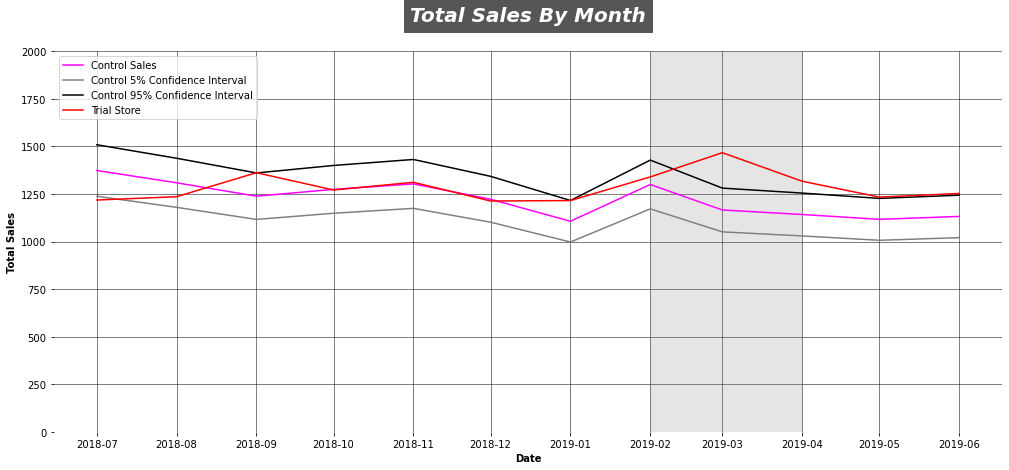

In [314]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_4,ci=95,ax=ax, palette = colors)
ax.set_title('Total Sales By Month',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total Sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((0, 2000))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)


plt.savefig('trial88_sales_assessment.png')

plt.show()

The results show that the trial in store 88 is significantly different to its control store in the trial period. The trial store performance lies outside the 5% to 95% confidence interval of the control store in the last two of the three trial months.

In [315]:
# Now let's move on to 'nCustomers'
# First, compute scaling factor
# Let's call this variable 'scalingFactorCustomers'

trial_customers = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'MONTHLY_NO_CUSTOMERS'].sum()
control_customers = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_3', 'MONTHLY_NO_CUSTOMERS'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

0.994131455399061

In [316]:
scaledControlCustomers = metrics
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [317]:
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
2743,237,201807,1387.2,125,1.248000,2018-07-01
2744,237,201808,1321.9,132,1.212121,2018-08-01
2745,237,201809,1250.8,120,1.183333,2018-09-01
2746,237,201810,1287.1,118,1.194915,2018-10-01
2747,237,201811,1316.0,125,1.224000,2018-11-01


In [318]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['MONTHLY_NO_CUSTOMERS'] * scalingFactorCustomers
scaledControlCustomers.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,controlCustomers
2743,237,201807,1387.2,125,1.248000,2018-07-01,124.266432
2744,237,201808,1321.9,132,1.212121,2018-08-01,131.225352
2745,237,201809,1250.8,120,1.183333,2018-09-01,119.295775
2746,237,201810,1287.1,118,1.194915,2018-10-01,117.307512
2747,237,201811,1316.0,125,1.224000,2018-11-01,124.266432


In [319]:
# Create 'percentageDiff' datasetsetframe
percentageDiff = scaledControlCustomers[['YEAR_MONTH', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = metrics.loc[metrics['STORE_NBR'] == trial_store, 'MONTHLY_NO_CUSTOMERS']
trialCustomers.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'trialCustomers'}, inplace = True)

percentageDiff

,YEAR_MONTH,controlCustomers,trialCustomers
0,201807,124.266432,124
1,201808,131.225352,124
2,201809,119.295775,121
3,201810,117.307512,120
4,201811,124.266432,123
5,201812,120.289906,120
6,201901,110.348592,115
7,201902,118.301643,122
8,201903,115.319249,133
9,201904,115.319249,119


In [320]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff

,YEAR_MONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,124.266432,124,0.002144
1,201808,131.225352,124,0.055061
2,201809,119.295775,121,0.014286
3,201810,117.307512,120,0.022952
4,201811,124.266432,123,0.010191
5,201812,120.289906,120,0.002410
6,201901,110.348592,115,0.042152
7,201902,118.301643,122,0.031262
8,201903,115.319249,133,0.153320
9,201904,115.319249,119,0.031918


In [321]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.02030475636865252

In [322]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [323]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7    1.539644
8    7.550942
9    1.571943
Name: tValue, dtype: float64

In [324]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

# Comment: We can see that the t-value is larger than the 95th percentile value of the t-distribution 

1.8945786050613054

In [325]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlCustomers' from 'scaledControlCustomers' datasetsetframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TXN_MONTH', 'controlCustomers']]
controlCustomers.set_index('TXN_MONTH', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TXN_MONTH,
2018-07-01,124.266432
2018-08-01,131.225352
2018-09-01,119.295775
2018-10-01,117.307512
2018-11-01,124.266432
2018-12-01,120.289906
2019-01-01,110.348592
2019-02-01,118.301643
2019-03-01,115.319249


In [326]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialCustomers = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'MONTHLY_NO_CUSTOMERS']]
trialCustomers.set_index('TXN_MONTH', inplace = True)
trialCustomers.rename(columns = {'MONTHLY_NO_CUSTOMERS': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TXN_MONTH,
2018-07-01,124
2018-08-01,124
2018-09-01,121
2018-10-01,120
2018-11-01,123
2018-12-01,120
2019-01-01,115
2019-02-01,122
2019-03-01,133


In [327]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,124.266432,119.220033,129.312831
2018-08-01,131.225352,125.896355,136.554350
2018-09-01,119.295775,114.451231,124.140318
2018-10-01,117.307512,112.543711,122.071313
2018-11-01,124.266432,119.220033,129.312831
2018-12-01,120.289906,115.404992,125.174821
2019-01-01,110.348592,105.867389,114.829794
2019-02-01,118.301643,113.497471,123.105815
2019-03-01,115.319249,110.636190,120.002307


In [328]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
TXN_MONTH,,,,
2018-07-01,124.266432,119.220033,129.312831,124
2018-08-01,131.225352,125.896355,136.554350,124
2018-09-01,119.295775,114.451231,124.140318,121
2018-10-01,117.307512,112.543711,122.071313,120
2018-11-01,124.266432,119.220033,129.312831,123
2018-12-01,120.289906,115.404992,125.174821,120
2019-01-01,110.348592,105.867389,114.829794,115
2019-02-01,118.301643,113.497471,123.105815,122
2019-03-01,115.319249,110.636190,120.002307,133


In [329]:
tidy_5 = combineCustomers.stack().reset_index().rename(columns={'level_1':'columns', 0:'values'})


tidy_5.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control Customers,124.266432
1,2018-07-01,Control 5% Confidence Interval,119.220033
2,2018-07-01,Control 95% Confidence Interval,129.312831
3,2018-07-01,Trial Customers,124.000000
4,2018-08-01,Control Customers,131.225352


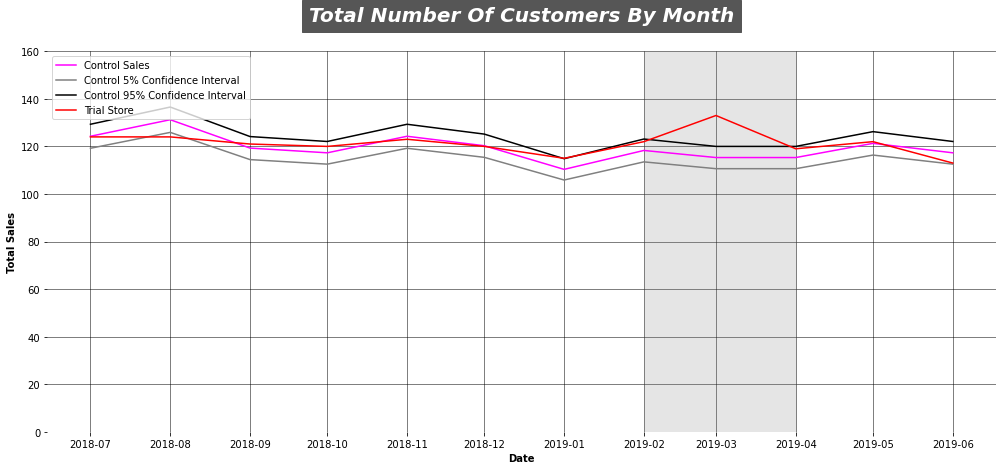

In [330]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_5,ci=95,ax=ax, palette = colors)
ax.set_title('Total Number Of Customers By Month',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total Sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((0, 160))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)


plt.savefig('trial88_customers_assessment.png')

plt.show()

Total number of customers in the trial period for the trial store is significantly higher than the control store for one out of the three trial months. From the graph above we can see that the first and third month of the trial period sees the number of customers fall slightly inside the 5% and 95% confidence interval. This goes on to say that the number of customers was not the major drive for the increased total number of sales in the third month of the trial period, as there was no significant change in the number of customers.

So we would be moving further towards assessing the monthly average number of transactions per customer to see if that was the major drive for the increased number of total sales in two out of the three trial months.

In [331]:
# Now let's move on to 'Average Transaction per customer'


# First, compute scaling factor
# Let's call this variable 'scalingFactorAVG_NO_TXN'

trial_AVG_NO_TXN = pretrialperiod.loc[pretrialperiod['store_type'] == 'Trial Store' , 'AVG_NO_TXN'].sum()
control_AVG_NO_TXN = pretrialperiod.loc[pretrialperiod['store_type'] == 'Control Store_3', 'AVG_NO_TXN'].sum()
scalingFactorAVG_NO_TXN = trial_AVG_NO_TXN / trial_AVG_NO_TXN
scalingFactorAVG_NO_TXN

1.0

In [332]:
scaledControlAVG_NO_TXN = metrics
scaledControlAVG_NO_TXN.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
0,1,201807,188.9,47,1.042553,2018-07-01
1,1,201808,165.7,40,1.000000,2018-08-01
2,1,201809,268.1,57,1.035088,2018-09-01
3,1,201810,175.4,39,1.025641,2018-10-01
4,1,201811,184.8,44,1.022727,2018-11-01


In [333]:
scaledControlAVG_NO_TXN = scaledControlAVG_NO_TXN.loc[scaledControlAVG_NO_TXN['STORE_NBR'] == control_store]
scaledControlAVG_NO_TXN.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH
2743,237,201807,1387.2,125,1.248000,2018-07-01
2744,237,201808,1321.9,132,1.212121,2018-08-01
2745,237,201809,1250.8,120,1.183333,2018-09-01
2746,237,201810,1287.1,118,1.194915,2018-10-01
2747,237,201811,1316.0,125,1.224000,2018-11-01


In [334]:
scaledControlAVG_NO_TXN['control_AVG_NO_TXN'] = scaledControlAVG_NO_TXN['AVG_NO_TXN'] * scalingFactorAVG_NO_TXN
scaledControlAVG_NO_TXN.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_TOTAL_SALES,MONTHLY_NO_CUSTOMERS,AVG_NO_TXN,TXN_MONTH,control_AVG_NO_TXN
2743,237,201807,1387.2,125,1.248000,2018-07-01,1.248000
2744,237,201808,1321.9,132,1.212121,2018-08-01,1.212121
2745,237,201809,1250.8,120,1.183333,2018-09-01,1.183333
2746,237,201810,1287.1,118,1.194915,2018-10-01,1.194915
2747,237,201811,1316.0,125,1.224000,2018-11-01,1.224000


In [335]:
# Create 'percentageDiff' datasetsetframe
percentageDiff = scaledControlAVG_NO_TXN[['YEAR_MONTH', 'control_AVG_NO_TXN']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trial_AVG_NO_TXN = metrics.loc[metrics['STORE_NBR'] == trial_store, 'AVG_NO_TXN']
trial_AVG_NO_TXN.reset_index(drop = True, inplace = True)

percentageDiff = pd.concat([percentageDiff, trial_AVG_NO_TXN], axis = 1)
percentageDiff.rename(columns = {'AVG_NO_TXN': 'trial_AVG_NO_TXN'}, inplace = True)

percentageDiff

,YEAR_MONTH,control_AVG_NO_TXN,trial_AVG_NO_TXN
0,201807,1.248000,1.161290
1,201808,1.212121,1.201613
2,201809,1.183333,1.247934
3,201810,1.194915,1.225000
4,201811,1.224000,1.211382
5,201812,1.165289,1.141667
6,201901,1.162162,1.217391
7,201902,1.243697,1.229508
8,201903,1.129310,1.263158
9,201904,1.120690,1.260504


In [336]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.control_AVG_NO_TXN - percentageDiff.trial_AVG_NO_TXN) / percentageDiff.control_AVG_NO_TXN
percentageDiff

,YEAR_MONTH,control_AVG_NO_TXN,trial_AVG_NO_TXN,percentageDiff
0,201807,1.248000,1.161290,0.069479
1,201808,1.212121,1.201613,0.008669
2,201809,1.183333,1.247934,0.054592
3,201810,1.194915,1.225000,0.025177
4,201811,1.224000,1.211382,0.010309
5,201812,1.165289,1.141667,0.020272
6,201901,1.162162,1.217391,0.047523
7,201902,1.243697,1.229508,0.011409
8,201903,1.129310,1.263158,0.118521
9,201904,1.120690,1.260504,0.124758


In [337]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH'] < 201902, 'percentageDiff'])
stdDev

0.023573674043250243

In [338]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7

dof = 7

In [339]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEAR_MONTH'] > 201901) & (percentageDiff['YEAR_MONTH'] < 201905), 'tValue']

7    0.483970
8    5.027706
9    5.292242
Name: tValue, dtype: float64

In [340]:
# Find the 95th percentile of the t distribution with dof = 7

t.isf(0.05, dof)

# Comment: We can see that the t-value is larger than the 95th percentile value of the t-distribution 

1.8945786050613054

In [341]:
# Time for some visualisation
# First we need to create the appropriate datasetsetframe
# Extract 'controlCustomers' from 'scaledControlCustomers' datasetsetframe for control store 

controlAVG_NO_TXN = scaledControlAVG_NO_TXN.loc[:, ['TXN_MONTH', 'control_AVG_NO_TXN']]
controlAVG_NO_TXN.set_index('TXN_MONTH', inplace = True)
controlAVG_NO_TXN.rename(columns = {'control_AVG_NO_TXN': 'Control AVG_NO_TXN'}, inplace = True)
controlAVG_NO_TXN

,Control AVG_NO_TXN
TXN_MONTH,
2018-07-01,1.248000
2018-08-01,1.212121
2018-09-01,1.183333
2018-10-01,1.194915
2018-11-01,1.224000
2018-12-01,1.165289
2019-01-01,1.162162
2019-02-01,1.243697
2019-03-01,1.129310


In [342]:
# Extract 'nCustomers' for trial store from 'measureOverTime'

trialAVG_NO_TXN = metrics.loc[metrics['STORE_NBR'] == trial_store, ['TXN_MONTH', 'AVG_NO_TXN']]
trialAVG_NO_TXN.set_index('TXN_MONTH', inplace = True)
trialAVG_NO_TXN.rename(columns = {'AVG_NO_TXN': 'Trial AVG_NO_TXN'}, inplace = True)
trialAVG_NO_TXN

,Trial AVG_NO_TXN
TXN_MONTH,
2018-07-01,1.161290
2018-08-01,1.201613
2018-09-01,1.247934
2018-10-01,1.225000
2018-11-01,1.211382
2018-12-01,1.141667
2019-01-01,1.217391
2019-02-01,1.229508
2019-03-01,1.263158


In [343]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlAVG_NO_TXN['Control 5% Confidence Interval'] = controlAVG_NO_TXN['Control AVG_NO_TXN'] * (1 - stdDev*2)
controlAVG_NO_TXN['Control 95% Confidence Interval'] = controlAVG_NO_TXN['Control AVG_NO_TXN'] * (1 + stdDev*2)
controlAVG_NO_TXN

,Control AVG_NO_TXN,Control 5% Confidence Interval,Control 95% Confidence Interval
TXN_MONTH,,,
2018-07-01,1.248000,1.189160,1.306840
2018-08-01,1.212121,1.154973,1.269270
2018-09-01,1.183333,1.127542,1.239124
2018-10-01,1.194915,1.138578,1.251252
2018-11-01,1.224000,1.166292,1.281708
2018-12-01,1.165289,1.110349,1.220230
2019-01-01,1.162162,1.107369,1.216955
2019-02-01,1.243697,1.185060,1.302335
2019-03-01,1.129310,1.076066,1.182554


In [344]:
# Merge the two datasetsetframes together 'controlSales' and 'trialSales'

combineAVG_NO_TXN = pd.merge(controlAVG_NO_TXN, trialAVG_NO_TXN, left_index = True, right_index = True)
combineAVG_NO_TXN

,Control AVG_NO_TXN,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial AVG_NO_TXN
TXN_MONTH,,,,
2018-07-01,1.248000,1.189160,1.306840,1.161290
2018-08-01,1.212121,1.154973,1.269270,1.201613
2018-09-01,1.183333,1.127542,1.239124,1.247934
2018-10-01,1.194915,1.138578,1.251252,1.225000
2018-11-01,1.224000,1.166292,1.281708,1.211382
2018-12-01,1.165289,1.110349,1.220230,1.141667
2019-01-01,1.162162,1.107369,1.216955,1.217391
2019-02-01,1.243697,1.185060,1.302335,1.229508
2019-03-01,1.129310,1.076066,1.182554,1.263158


In [365]:
tidy_7= combineAVG_NO_TXN.stack().reset_index().rename(columns={'level_1':'columns', 0:'values'})


tidy_7.head()

,TXN_MONTH,columns,values
0,2018-07-01,Control AVG_NO_TXN,1.248000
1,2018-07-01,Control 5% Confidence Interval,1.189160
2,2018-07-01,Control 95% Confidence Interval,1.306840
3,2018-07-01,Trial AVG_NO_TXN,1.161290
4,2018-08-01,Control AVG_NO_TXN,1.212121


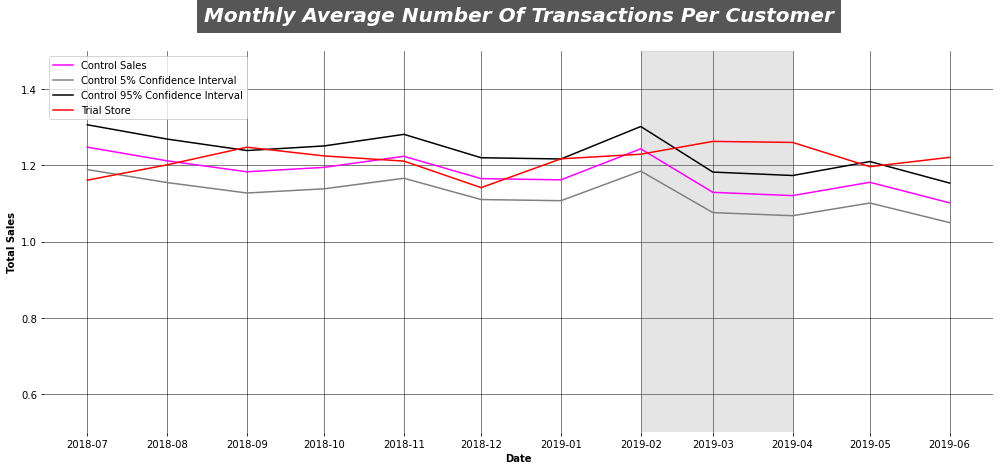

In [366]:
fig,ax = plt.subplots(figsize=(17,7))
colors = ['magenta', 'grey', 'black', 'red']

sns.lineplot(x='TXN_MONTH',y='values', hue= 'columns',
             data=tidy_7,ci=95,ax=ax, palette = colors)
ax.set_title('Monthly Average Number Of Transactions Per Customer',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(True, linewidth=0.5,color='black')
ax.xaxis.grid(True, linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

#specify the the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator())

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)


##specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

ax.set_xlabel('Date',weight='bold',size=10)
ax.set_ylabel('Total Sales',weight='bold',size=10)

# Set new y-axis limit
plt.ylim((0.5, 1.5))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)


plt.savefig('trial88_avg_txn_assessment.png')

plt.show()

From the visualization provided above, it is obvious that the increase in number of total sales in the trial period, was also influenced by the average number of transactions per customer. The average number of transactions in the trial period falls outside the 5% and 95% confidence interval in the last two months of the trial period which signifies a positive impact on the  total number of total sales.

# Conclusion

We've found: 
control stores 233, for trial store 77; 
control stores 155, for trial store 86; and 
control stores 237, for trial store 88.


After assesssing the control and trial stores during the trial period, which was from the start of **February** to the end of **April**, we discovered the the following;

The result for trial store 77 shows a significant difference in the total number of sales for the month of **March and April**, and this aligns with number of customers during this period as there was also a significant change in number of customers in the final two months of the trial period.


The result for trial store 86 shows a significant change in the total number of sales for the month of **February and March**, even from our chat it was evident that the first month slightly edged out the 95% control interval, But when compared to the significant increase in the number of cusstomers during the trial period, it would be obvious that the total number of sales within the trial period falls short of the kind of significant increase that occured in customers within this period.Therefore, we can say that there was a significant increase in customers but it didnt reflect much in th total sales in this period,


The result for trial store 88 shows a significant increase in the total number of sales for the month of **March and April**, but this does not align with the number of customers within this period.For the total number of customers we see a significant change only in the month of March, as the first and last month of the trial period falls inside the 5% and 95% confidence interval. So we can see that the number of customers were not the main drive for the significant change in the month of April. So, we proceeded towards assessing the monthly average of transaction per customer during the trial period and discovered that the average number of transaction per customer was the main drive towards the increased sales in the trial period.


Furthermore, we can conclude that the trial period recorded a significant change 